In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, TruncatedSVD

In [2]:
# load the dataset.
df = pd.read_csv("/Users/harshil/Desktop/Online Fashion E-Commerce Reviews.csv")
df.head()

Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

### EDA

In [3]:
# list of column names.
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [4]:
# there are 23486 rows and 11 columns.
df.shape

(23486, 11)

In [5]:
df.count()

Unnamed: 0                 23486
Clothing ID                23486
Age                        23486
Title                      19676
Review Text                22641
Rating                     23486
Recommended IND            23486
Positive Feedback Count    23486
Division Name              23472
Department Name            23472
Class Name                 23472
dtype: int64

In [6]:
# take out the 'Unnamed: 0' and 'Clothing ID' column.
# don't think they will be useful for my analysis.
df = df.drop(['Unnamed: 0', 'Clothing ID'], axis=1)

# clean the white space from the column names.
df = df.rename(columns=lambda x: x.replace(' ', ''))

In [7]:
df.head()

Age                    Title  \
0   33                      NaN   
1   34                      NaN   
2   60  Some major design flaws   
3   50         My favorite buy!   
4   47         Flattering shirt   

                                          ReviewText  Rating  RecommendedIND  \
0  Absolutely wonderful - silky and sexy and comf...       4               1   
1  Love this dress!  it's sooo pretty.  i happene...       5               1   
2  I had such high hopes for this dress and reall...       3               0   
3  I love, love, love this jumpsuit. it's fun, fl...       5               1   
4  This shirt is very flattering to all due to th...       5               1   

   PositiveFeedbackCount    DivisionName DepartmentName  ClassName  
0                      0       Initmates       Intimate  Intimates  
1                      4         General        Dresses    Dresses  
2                      0         General        Dresses    Dresses  
3                      0  General Petite        Bottoms      Pants  
4                      6         General           Tops    Blouses

In [8]:
# there are NaN in Title, ReviewText, DivisionName, DepartmentName, ClassName column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 9 columns):
Age                      23486 non-null int64
Title                    19676 non-null object
ReviewText               22641 non-null object
Rating                   23486 non-null int64
RecommendedIND           23486 non-null int64
PositiveFeedbackCount    23486 non-null int64
DivisionName             23472 non-null object
DepartmentName           23472 non-null object
ClassName                23472 non-null object
dtypes: int64(4), object(5)
memory usage: 1.6+ MB


In [12]:
# dorpping NAs for 4 columns.
subset = ['ReviewText', 'DivisionName', 'DepartmentName', 'ClassName']
df = df.dropna(subset=subset)

In [13]:
df.head()

Age                    Title  \
0   33                      NaN   
1   34                      NaN   
2   60  Some major design flaws   
3   50         My favorite buy!   
4   47         Flattering shirt   

                                          ReviewText  Rating  RecommendedIND  \
0  Absolutely wonderful - silky and sexy and comf...       4               1   
1  Love this dress!  it's sooo pretty.  i happene...       5               1   
2  I had such high hopes for this dress and reall...       3               0   
3  I love, love, love this jumpsuit. it's fun, fl...       5               1   
4  This shirt is very flattering to all due to th...       5               1   

   PositiveFeedbackCount    DivisionName DepartmentName  ClassName  
0                      0       Initmates       Intimate  Intimates  
1                      4         General        Dresses    Dresses  
2                      0         General        Dresses    Dresses  
3                      0  General Petite        Bottoms      Pants  
4                      6         General           Tops    Blouses

In [14]:
df.count()

Age                      22628
Title                    19662
ReviewText               22628
Rating                   22628
RecommendedIND           22628
PositiveFeedbackCount    22628
DivisionName             22628
DepartmentName           22628
ClassName                22628
dtype: int64

In [15]:
# first fill NAs in the Title column with space, so I can concatenate the Title and ReviewText column together.
df.Title.fillna('', inplace=True)

In [16]:
df.head()

Age                    Title  \
0   33                            
1   34                            
2   60  Some major design flaws   
3   50         My favorite buy!   
4   47         Flattering shirt   

                                          ReviewText  Rating  RecommendedIND  \
0  Absolutely wonderful - silky and sexy and comf...       4               1   
1  Love this dress!  it's sooo pretty.  i happene...       5               1   
2  I had such high hopes for this dress and reall...       3               0   
3  I love, love, love this jumpsuit. it's fun, fl...       5               1   
4  This shirt is very flattering to all due to th...       5               1   

   PositiveFeedbackCount    DivisionName DepartmentName  ClassName  
0                      0       Initmates       Intimate  Intimates  
1                      4         General        Dresses    Dresses  
2                      0         General        Dresses    Dresses  
3                      0  General Petite        Bottoms      Pants  
4                      6         General           Tops    Blouses

In [17]:
# create a new column named CombinedText with Title and ReviewText.
df['CombinedText'] = df.Title + ' ' + df.ReviewText

In [18]:
df.head()

Age                    Title  \
0   33                            
1   34                            
2   60  Some major design flaws   
3   50         My favorite buy!   
4   47         Flattering shirt   

                                          ReviewText  Rating  RecommendedIND  \
0  Absolutely wonderful - silky and sexy and comf...       4               1   
1  Love this dress!  it's sooo pretty.  i happene...       5               1   
2  I had such high hopes for this dress and reall...       3               0   
3  I love, love, love this jumpsuit. it's fun, fl...       5               1   
4  This shirt is very flattering to all due to th...       5               1   

   PositiveFeedbackCount    DivisionName DepartmentName  ClassName  \
0                      0       Initmates       Intimate  Intimates   
1                      4         General        Dresses    Dresses   
2                      0         General        Dresses    Dresses   
3                      0  General Petite        Bottoms      Pants   
4                      6         General           Tops    Blouses   

                                        CombinedText  
0   Absolutely wonderful - silky and sexy and com...  
1   Love this dress!  it's sooo pretty.  i happen...  
2  Some major design flaws I had such high hopes ...  
3  My favorite buy! I love, love, love this jumps...  
4  Flattering shirt This shirt is very flattering...

In [19]:
# drop the Title column.
df.drop('Title', axis=1, inplace=True)

In [20]:
df.head()

Age                                         ReviewText  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it's sooo pretty.  i happene...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it's fun, fl...       5   
4   47  This shirt is very flattering to all due to th...       5   

   RecommendedIND  PositiveFeedbackCount    DivisionName DepartmentName  \
0               1                      0       Initmates       Intimate   
1               1                      4         General        Dresses   
2               0                      0         General        Dresses   
3               1                      0  General Petite        Bottoms   
4               1                      6         General           Tops   

   ClassName                                       CombinedText  
0  Intimates   Absolutely wonderful - silky and sexy and com...  
1    Dresses   Love this dress!  it's sooo pretty.  i happen...  
2    Dresses  Some major design flaws I had such high hopes ...  
3      Pants  My favorite buy! I love, love, love this jumps...  
4    Blouses  Flattering shirt This shirt is very flattering...

In [21]:
# general stats for the 4 numeric columns.
df.describe()

Age        Rating  RecommendedIND  PositiveFeedbackCount
count  22628.000000  22628.000000    22628.000000           22628.000000
mean      43.282880      4.183092        0.818764               2.631784
std       12.328176      1.115911        0.385222               5.787520
min       18.000000      1.000000        0.000000               0.000000
25%       34.000000      4.000000        1.000000               0.000000
50%       41.000000      5.000000        1.000000               1.000000
75%       52.000000      5.000000        1.000000               3.000000
max       99.000000      5.000000        1.000000             122.000000

In [22]:
# there is no more NAs
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22628 entries, 0 to 23485
Data columns (total 9 columns):
Age                      22628 non-null int64
ReviewText               22628 non-null object
Rating                   22628 non-null int64
RecommendedIND           22628 non-null int64
PositiveFeedbackCount    22628 non-null int64
DivisionName             22628 non-null object
DepartmentName           22628 non-null object
ClassName                22628 non-null object
CombinedText             22628 non-null object
dtypes: int64(4), object(5)
memory usage: 1.7+ MB


### Export as Pickle

In [23]:
df.to_pickle('cleaned_df.pkl')

### Reading the cleaned data from EDA

In [24]:
df = pd.read_pickle('cleaned_df.pkl')
df.head()

Age                                         ReviewText  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it's sooo pretty.  i happene...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it's fun, fl...       5   
4   47  This shirt is very flattering to all due to th...       5   

   RecommendedIND  PositiveFeedbackCount    DivisionName DepartmentName  \
0               1                      0       Initmates       Intimate   
1               1                      4         General        Dresses   
2               0                      0         General        Dresses   
3               1                      0  General Petite        Bottoms   
4               1                      6         General           Tops   

   ClassName                                       CombinedText  
0  Intimates   Absolutely wonderful - silky and sexy and com...  
1    Dresses   Love this dress!  it's sooo pretty.  i happen...  
2    Dresses  Some major design flaws I had such high hopes ...  
3      Pants  My favorite buy! I love, love, love this jumps...  
4    Blouses  Flattering shirt This shirt is very flattering...

##### Clean it a little bit more - Remove some of the less useful frequent words that could exist in the reviews, such as dress, dresses and etc.

In [25]:
words_to_remove = ['love', 'dress', 'dresses']
text = 'I love things about dresses but not dress.'

import re
pattern = [f'(\\b{word}\\b)' for word in words_to_remove]
pattern = '|'.join(pattern)
re.sub(pattern, '', text)

'I  things about  but not .'

In [26]:
df['ReviewTextLower'] = df.ReviewText

In [27]:
df.head()

Age                                         ReviewText  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it's sooo pretty.  i happene...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it's fun, fl...       5   
4   47  This shirt is very flattering to all due to th...       5   

   RecommendedIND  PositiveFeedbackCount    DivisionName DepartmentName  \
0               1                      0       Initmates       Intimate   
1               1                      4         General        Dresses   
2               0                      0         General        Dresses   
3               1                      0  General Petite        Bottoms   
4               1                      6         General           Tops   

   ClassName                                       CombinedText  \
0  Intimates   Absolutely wonderful - silky and sexy and com...   
1    Dresses   Love this dress!  it's sooo pretty.  i happen...   
2    Dresses  Some major design flaws I had such high hopes ...   
3      Pants  My favorite buy! I love, love, love this jumps...   
4    Blouses  Flattering shirt This shirt is very flattering...   

                                     ReviewTextLower  
0  Absolutely wonderful - silky and sexy and comf...  
1  Love this dress!  it's sooo pretty.  i happene...  
2  I had such high hopes for this dress and reall...  
3  I love, love, love this jumpsuit. it's fun, fl...  
4  This shirt is very flattering to all due to th...

In [28]:
df['ReviewTextLower'] = df.ReviewTextLower.str.lower()

In [29]:
df.head()

Age                                         ReviewText  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it's sooo pretty.  i happene...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it's fun, fl...       5   
4   47  This shirt is very flattering to all due to th...       5   

   RecommendedIND  PositiveFeedbackCount    DivisionName DepartmentName  \
0               1                      0       Initmates       Intimate   
1               1                      4         General        Dresses   
2               0                      0         General        Dresses   
3               1                      0  General Petite        Bottoms   
4               1                      6         General           Tops   

   ClassName                                       CombinedText  \
0  Intimates   Absolutely wonderful - silky and sexy and com...   
1    Dresses   Love this dress!  it's sooo pretty.  i happen...   
2    Dresses  Some major design flaws I had such high hopes ...   
3      Pants  My favorite buy! I love, love, love this jumps...   
4    Blouses  Flattering shirt This shirt is very flattering...   

                                     ReviewTextLower  
0  absolutely wonderful - silky and sexy and comf...  
1  love this dress!  it's sooo pretty.  i happene...  
2  i had such high hopes for this dress and reall...  
3  i love, love, love this jumpsuit. it's fun, fl...  
4  this shirt is very flattering to all due to th...

In [30]:
df['ReviewTextLower'].replace(to_replace=pattern, value='', regex=True, inplace=True)

In [31]:
df.head()

Age                                         ReviewText  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it's sooo pretty.  i happene...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it's fun, fl...       5   
4   47  This shirt is very flattering to all due to th...       5   

   RecommendedIND  PositiveFeedbackCount    DivisionName DepartmentName  \
0               1                      0       Initmates       Intimate   
1               1                      4         General        Dresses   
2               0                      0         General        Dresses   
3               1                      0  General Petite        Bottoms   
4               1                      6         General           Tops   

   ClassName                                       CombinedText  \
0  Intimates   Absolutely wonderful - silky and sexy and com...   
1    Dresses   Love this dress!  it's sooo pretty.  i happen...   
2    Dresses  Some major design flaws I had such high hopes ...   
3      Pants  My favorite buy! I love, love, love this jumps...   
4    Blouses  Flattering shirt This shirt is very flattering...   

                                     ReviewTextLower  
0  absolutely wonderful - silky and sexy and comf...  
1   this !  it's sooo pretty.  i happened to find...  
2  i had such high hopes for this  and really wan...  
3  i , ,  this jumpsuit. it's fun, flirty, and fa...  
4  this shirt is very flattering to all due to th...

### Vectorizer the text data

In [32]:
count_vectorizer = CountVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6, max_features=4000)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6, max_features=4000)

cv_data = count_vectorizer.fit_transform(df.ReviewTextLower)
tfidf_data = tfidf_vectorizer.fit_transform(df.ReviewTextLower)

In [33]:
tfidf_data

<22628x4000 sparse matrix of type '<class 'numpy.float64'>'
	with 582655 stored elements in Compressed Sparse Row format>

### Create the word cloud

In [35]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from wordcloud import WordCloud

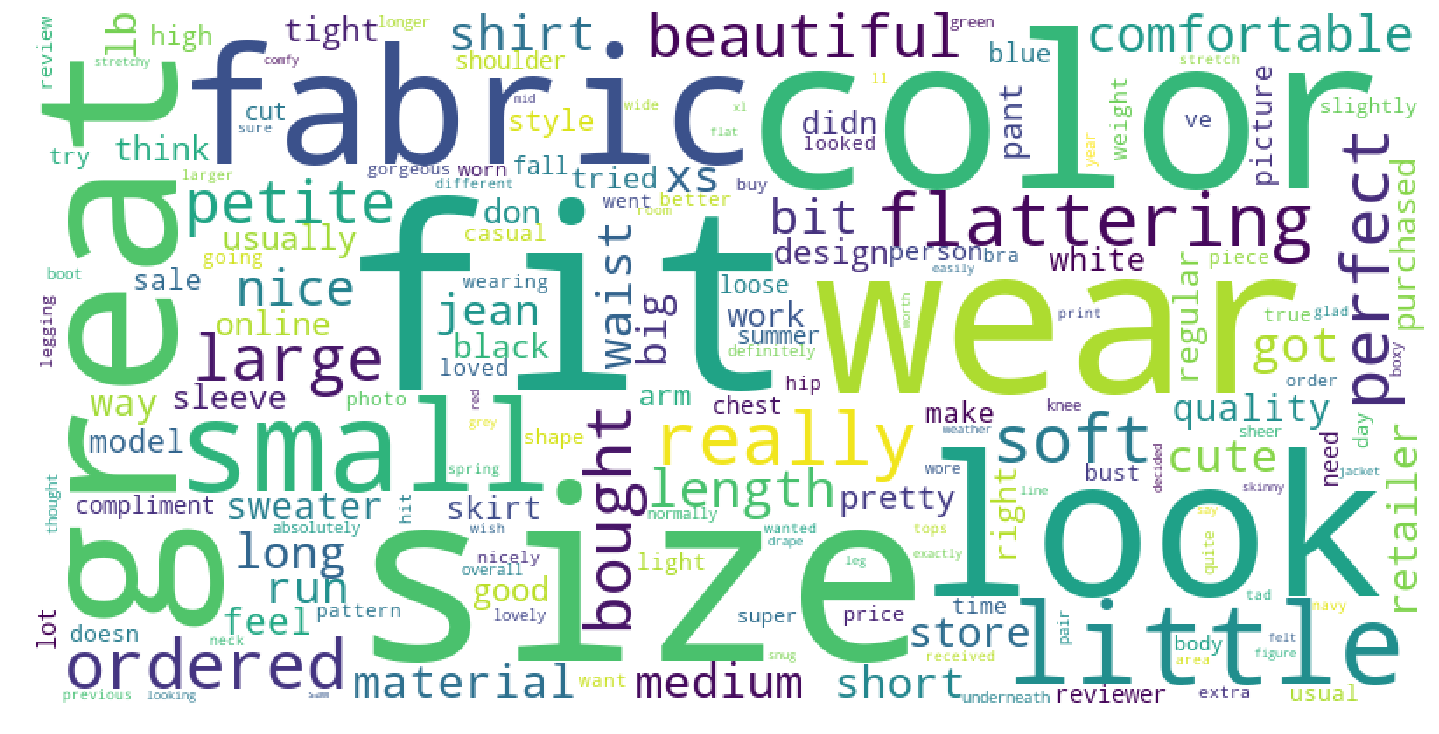

In [36]:
for_wordcloud = count_vectorizer.get_feature_names()
for_wordcloud = for_wordcloud
for_wordcloud_str = ' '.join(for_wordcloud)

wordcloud = WordCloud(width=800, height=400, background_color ='white',
                      min_font_size = 7).generate(for_wordcloud_str)

plt.figure(figsize=(20, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
 
plt.show()

### Change it to black background

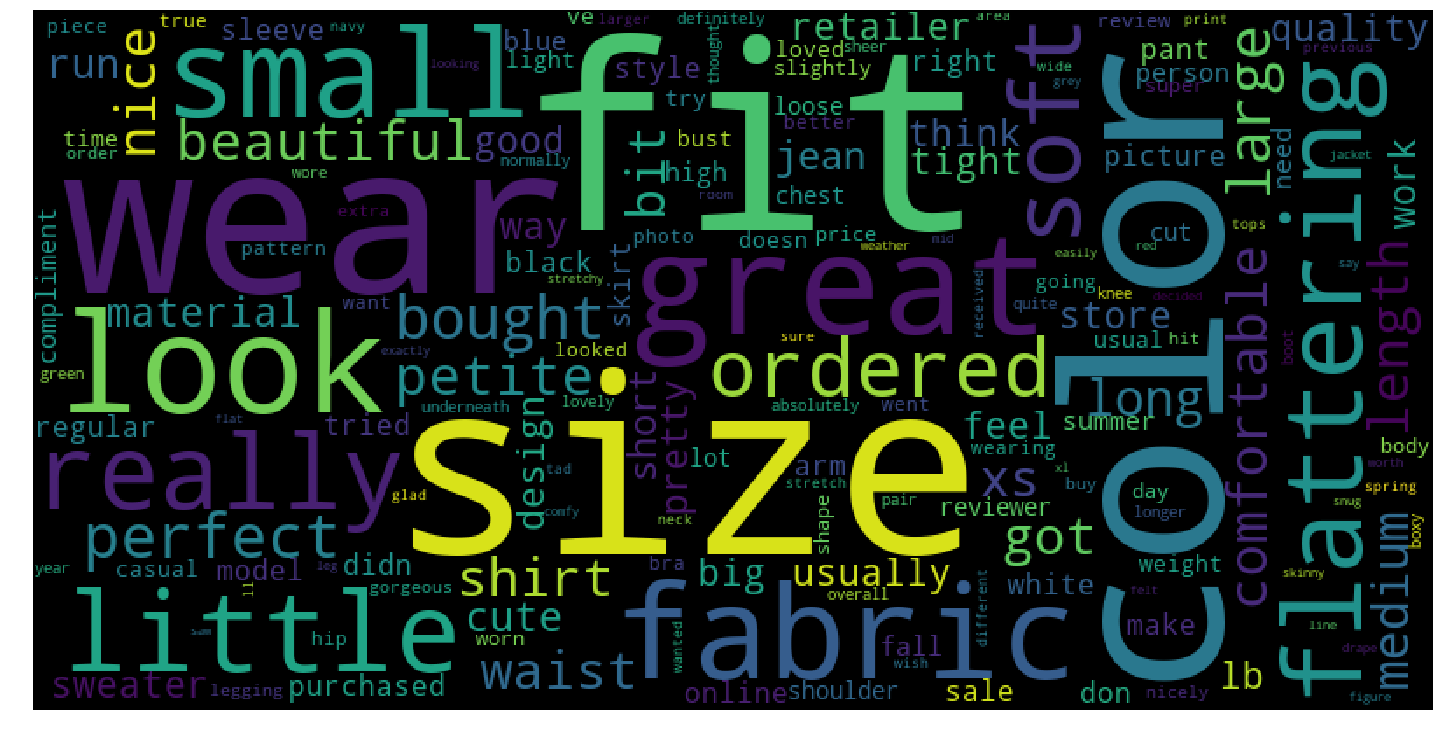

In [37]:
for_wordcloud = count_vectorizer.get_feature_names()
for_wordcloud = for_wordcloud
for_wordcloud_str = ' '.join(for_wordcloud)

wordcloud = WordCloud(width=800, height=400, background_color ='black',
                      min_font_size = 7).generate(for_wordcloud_str)

plt.figure(figsize=(20, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
 
plt.show()

### Topic Modeling 

In [38]:
df.to_pickle('cleaned_df.pkl')

In [39]:
df.head()

Age                                         ReviewText  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it's sooo pretty.  i happene...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it's fun, fl...       5   
4   47  This shirt is very flattering to all due to th...       5   

   RecommendedIND  PositiveFeedbackCount    DivisionName DepartmentName  \
0               1                      0       Initmates       Intimate   
1               1                      4         General        Dresses   
2               0                      0         General        Dresses   
3               1                      0  General Petite        Bottoms   
4               1                      6         General           Tops   

   ClassName                                       CombinedText  \
0  Intimates   Absolutely wonderful - silky and sexy and com...   
1    Dresses   Love this dress!  it's sooo pretty.  i happen...   
2    Dresses  Some major design flaws I had such high hopes ...   
3      Pants  My favorite buy! I love, love, love this jumps...   
4    Blouses  Flattering shirt This shirt is very flattering...   

                                     ReviewTextLower  
0  absolutely wonderful - silky and sexy and comf...  
1   this !  it's sooo pretty.  i happened to find...  
2  i had such high hopes for this  and really wan...  
3  i , ,  this jumpsuit. it's fun, flirty, and fa...  
4  this shirt is very flattering to all due to th...

### Remove some frequent words

In [40]:
words_to_remove = ['love', 'dress', 'dresses']
text = 'I love things about dresses but not dress.'

import re
pattern = [f'(\\b{word}\\b)' for word in words_to_remove]
pattern = '|'.join(pattern)
re.sub(pattern, '', text)

'I  things about  but not .'

In [41]:
df['ReviewTextLower'] = df.ReviewText

In [42]:
df['ReviewTextLower'] = df.ReviewTextLower.str.lower()

In [43]:
df['ReviewTextLower'].replace(to_replace=pattern, value='', regex=True, inplace=True)

In [44]:
count_vectorizer = CountVectorizer(ngram_range=(1, 3),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6, max_features=4000)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(2, 3),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6, max_features=4000)

cv_data = count_vectorizer.fit_transform(df.ReviewTextLower)
tfidf_data = tfidf_vectorizer.fit_transform(df.ReviewTextLower)

### Try Topic Modelings

In [45]:
# def functions for topic modelings
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
def display_topics2(model, feature_names, no_top_words=10, topic_names = None):
    for index, topic in enumerate(model.components_):
        if not topic_names or not topic_names[index]:
            print(f"\nTopic {index}")
        else:
            print(f"\nTopic {topic_names[index]}:")
        msg = ", ".join([f'{feature_names[i]} ({topic[i]:6.4f})' 
                             for i in topic.argsort()[:-no_top_words-1:-1]])
        print(msg)

In [46]:
# try using 50 dimensions
n_comp = 50
lsa_tfidf = TruncatedSVD(n_components=n_comp)
lsa_cv = TruncatedSVD(n_components=n_comp)
nmf_tfidf = NMF(n_components=n_comp)
nmf_cv = NMF(n_components=n_comp)

lsa_tfidf_data = lsa_tfidf.fit_transform(tfidf_data)
lsa_cv_data = lsa_cv.fit_transform(cv_data)
nmf_tfidf_data = nmf_tfidf.fit_transform(tfidf_data)
nmf_cv_data = nmf_cv.fit_transform(cv_data)

In [48]:
# topic modeling with lsa and tfidf
display_topics2(lsa_tfidf, tfidf_vectorizer.get_feature_names(),10)


Topic 0
true size (0.7192), fits true (0.2980), fits true size (0.2964), fit true (0.1697), fit true size (0.1690), looks great (0.0992), runs true (0.0958), runs true size (0.0944), fit perfectly (0.0759), usually wear (0.0747)

Topic 1
true size (0.3337), fits true (0.2026), fits true size (0.2015), fit true size (0.0719), fit true (0.0710), runs true size (0.0274), runs true (0.0245), true size flattering (0.0149), size flattering (0.0128), true size great (0.0126)

Topic 2
looks great (0.8907), great jeans (0.1610), looks great jeans (0.1457), skinny jeans (0.0792), great skinny (0.0548), comfortable looks (0.0478), comfortable looks great (0.0468), looks great skinny (0.0468), great skinny jeans (0.0440), jeans leggings (0.0415)

Topic 3
super cute (0.9410), highly recommend (0.0762), cute comfortable (0.0637), cute flattering (0.0514), super cute flattering (0.0505), cute material (0.0355), look great (0.0336), cute comfy (0.0272), super comfy (0.0260), looks super (0.0258)

Top

In [49]:
# topic modeling with nmf and tfidf
display_topics2(nmf_tfidf, tfidf_vectorizer.get_feature_names(),10)


Topic 0
fits true (2.7879), fits true size (2.7643), true size (2.0996), true size flattering (0.1336), size flattering (0.1311), prettier person (0.1169), true size great (0.1030), size great (0.0997), beautiful person (0.0888), size soft (0.0878)

Topic 1
ordered small (15.2650), small medium (9.2276), wear small (4.7488), extra small (4.6399), usually small (3.2829), ordered medium (3.2388), small fits (2.5985), wear small medium (2.4996), small fit (2.4180), lbs ordered (2.3015)

Topic 2
looks great (2.5526), great jeans (0.4429), looks great jeans (0.4094), comfortable looks (0.1330), comfortable looks great (0.1284), looks great skinny (0.0949), looks great model (0.0939), great model (0.0926), flattering looks (0.0908), great wear (0.0863)

Topic 3
super cute (2.6336), cute comfortable (0.1641), cute flattering (0.1445), super cute flattering (0.1414), cute material (0.0982), looks super cute (0.0720), looks super (0.0720), cute comfy (0.0719), cute great (0.0651), jeans super 

In [50]:
# topic modeling with nmf and countvectorizer
display_topics2(nmf_cv, count_vectorizer.get_feature_names(),10)


Topic 0
great (35.4863), looks great (2.4076), fit great (1.7162), fall (1.4107), look great (1.3371), summer (1.2475), fits great (1.1298), great fit (1.0476), great quality (0.9790), piece (0.9182)

Topic 1
size (9.2446), usual (0.5583), usual size (0.4667), smaller (0.4011), size small (0.3900), normal (0.3690), wear size (0.3600), size fit (0.3295), normal size (0.3244), ordered size (0.3161)

Topic 2
like (8.0394), feel (0.5814), feel like (0.4250), looked (0.3539), look like (0.3389), model (0.2850), looked like (0.2844), felt (0.2592), looks like (0.2588), really like (0.2444)

Topic 3
wear (11.3359), usually wear (0.9980), usually (0.7222), wait (0.5119), wear size (0.5003), normally wear (0.4926), bra (0.4500), easy (0.4435), wait wear (0.4189), underneath (0.4188)

Topic 4
fit (12.3187), fit perfectly (1.0400), perfectly (1.0334), size fit (0.5022), fit great (0.4096), better (0.3894), loose (0.3862), tight (0.3548), fit like (0.3403), fit perfect (0.3162)

Topic 5
just (10.

### SS

In [51]:
# initialize vectorizers
count_vectorizer = CountVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6, max_features=4000)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6, max_features=4000)

# transfomred my text data using vectorizers
cv_data = count_vectorizer.fit_transform(df.ReviewTextLower)
tfidf_data = tfidf_vectorizer.fit_transform(df.ReviewTextLower)

In [52]:
# initialized reducers with dimensions
n_comp = 5
lsa_tfidf = TruncatedSVD(n_components=n_comp)
lsa_cv = TruncatedSVD(n_components=n_comp)
nmf_tfidf = NMF(n_components=n_comp)
nmf_cv = NMF(n_components=n_comp)

# transformed my vectorizers data using reducers
lsa_tfidf_data = lsa_tfidf.fit_transform(tfidf_data)
lsa_cv_data = lsa_cv.fit_transform(cv_data)
nmf_tfidf_data = nmf_tfidf.fit_transform(tfidf_data)
nmf_cv_data = nmf_cv.fit_transform(cv_data)

In [53]:
# initialize standardscaler
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

# transform my reducer data using standardscaler
lsa_tfidf_data_sclaed = SS.fit_transform(lsa_tfidf_data)
lsa_cv_data_sclaed = SS.fit_transform(lsa_cv_data)
nmf_tfidf_data_scaled = SS.fit_transform(nmf_tfidf_data)
nmf_cv_data_scaled = SS.fit_transform(nmf_cv_data)

In [54]:
display_topics2(lsa_tfidf, tfidf_vectorizer.get_feature_names(),8)


Topic 0
size (0.2144), fit (0.1781), like (0.1731), great (0.1686), wear (0.1614), just (0.1463), small (0.1424), fabric (0.1303)

Topic 1
great (0.3705), jeans (0.1971), comfortable (0.1875), soft (0.1455), looks (0.1155), sweater (0.1125), shirt (0.1090), perfect (0.1055)

Topic 2
size (0.4070), true (0.2734), true size (0.2709), great (0.2448), fits (0.1545), perfect (0.1385), wear (0.1193), comfortable (0.1117)

Topic 3
small (0.3662), wear (0.2506), medium (0.2399), shirt (0.2332), large (0.2004), cute (0.1342), usually (0.1285), runs (0.1274)

Topic 4
shirt (0.5046), true (0.2296), true size (0.2274), cute (0.1697), size (0.1436), fits (0.1354), fits true (0.1117), runs (0.1054)


In [55]:
#lsa = TruncatedSVD(n_components=50)
#lsa_tfidf_data = lsa.fit_transform(tfidf_data)
terms = tfidf_vectorizer.get_feature_names()

for i in range(0,10):
    word_list=[]
    print("Topic%d:"% i)
    for j in lsa_tfidf.components_.argsort()[i, -16:-1]:
        word_list.append(terms[j])
    print(word_list)

Topic0:
['soft', 'flattering', 'little', 'perfect', 'ordered', 'look', 'really', 'color', 'fabric', 'small', 'just', 'wear', 'great', 'like', 'fit']
Topic1:
['casual', 'compliments', 'leggings', 'pants', 'fall', 'super', 'color', 'looks great', 'perfect', 'shirt', 'sweater', 'looks', 'soft', 'comfortable', 'jeans']
Topic2:
['fit true', 'runs', 'medium', 'perfectly', 'fit', 'jeans', 'fits true', 'small', 'comfortable', 'wear', 'perfect', 'fits', 'great', 'true size', 'true']
Topic3:
['small medium', 'super', 'got', 'great', 'compliments', 'sweater', 'usually wear', 'xs', 'runs', 'usually', 'cute', 'large', 'shirt', 'medium', 'wear']
Topic4:
['pretty', 'large', 'colors', 'comfortable', 'material', 'sweater', 'beautiful', 'soft', 'runs', 'fits true', 'fits', 'size', 'cute', 'true size', 'true']
Topic5:


IndexError: index 5 is out of bounds for axis 0 with size 5

### Clustering 

In [56]:
SSEs = []
Sil_coefs = []
for k in range(2,10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(lsa_tfidf_data_sclaed)
    labels = km.labels_
    Sil_coefs.append(silhouette_score(lsa_tfidf_data_sclaed, labels, metric='euclidean'))
    SSEs.append(km.inertia_)

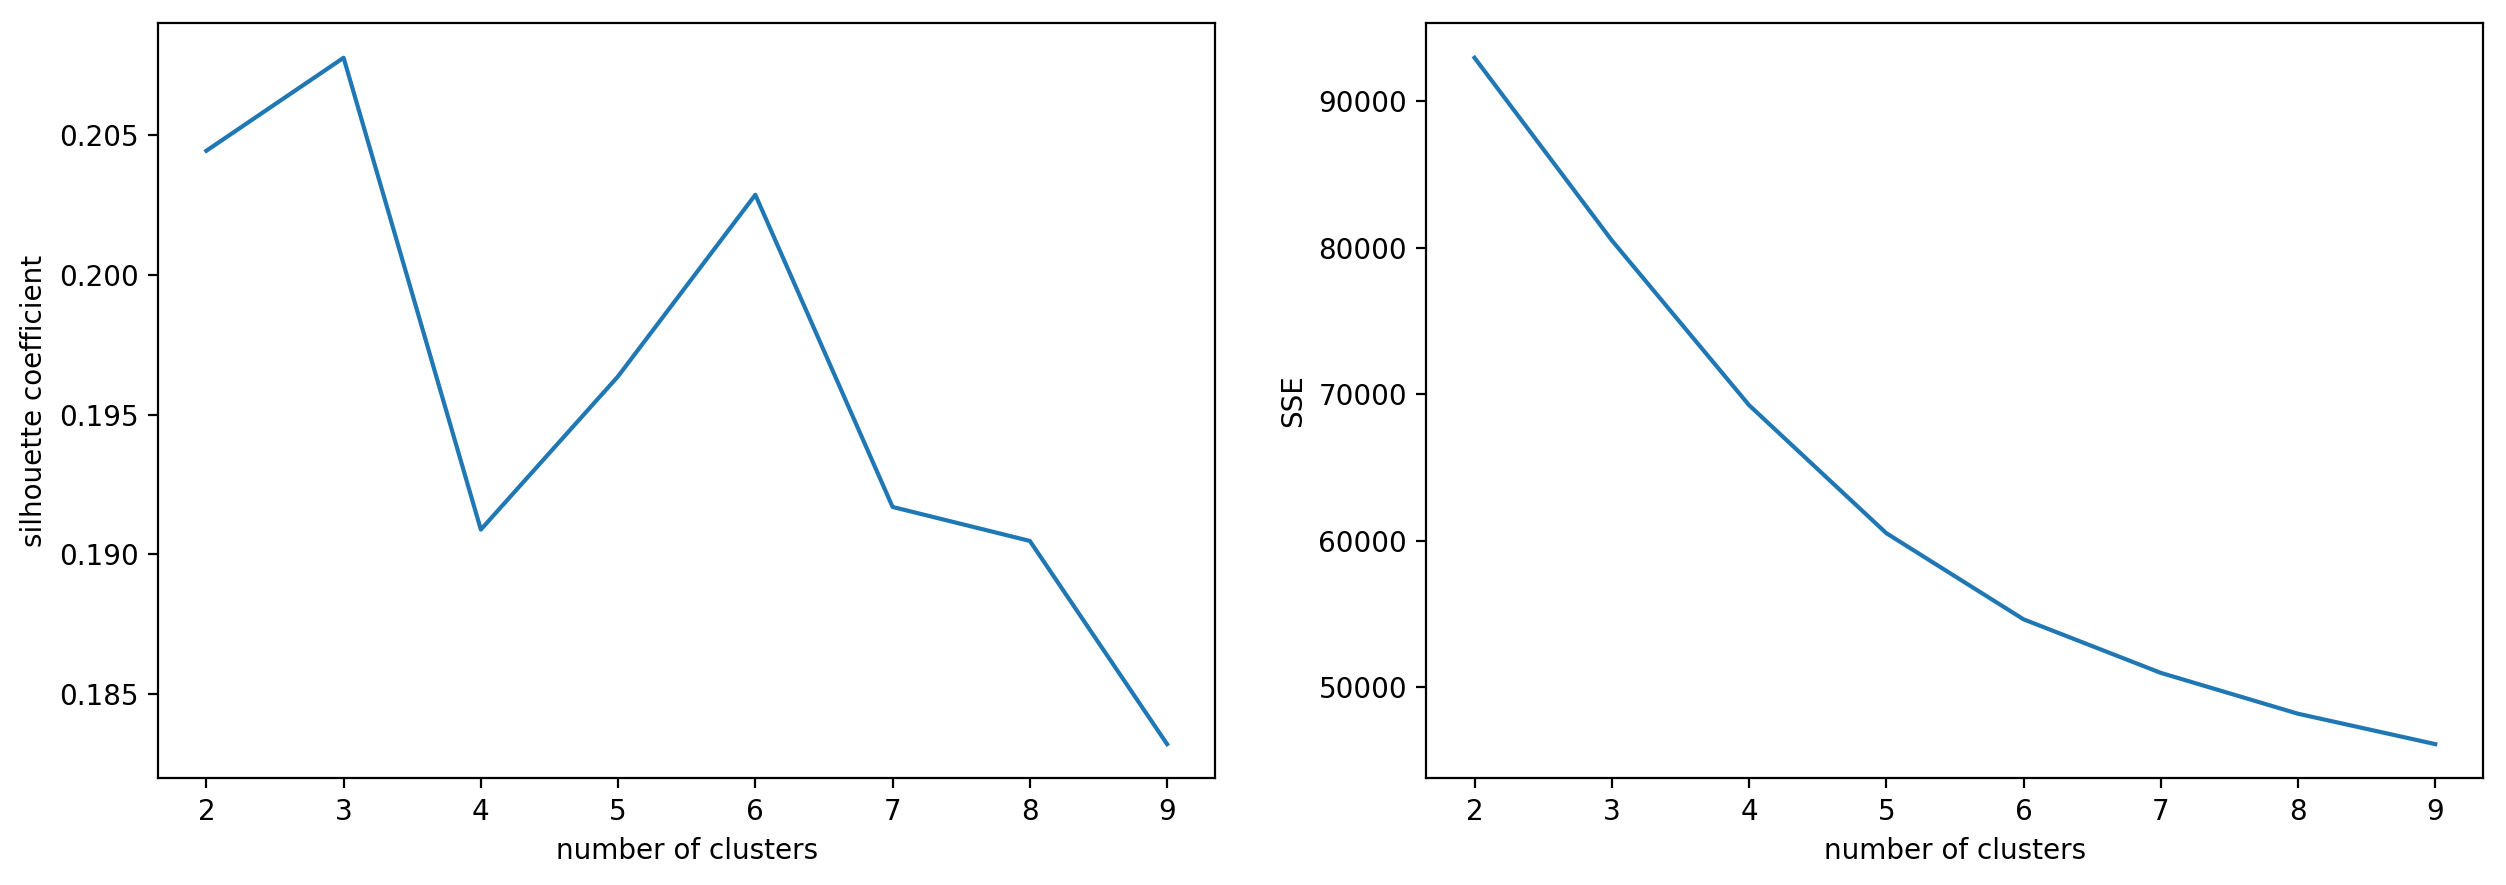

In [57]:

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True, dpi=200)
k_clusters = range(2,10)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')

# plot here on ax2
ax2.plot(k_clusters, SSEs)
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('SSE');

In [58]:
inertia = [0,0]

for n_clusters in range(2, 25):
    km = KMeans(n_clusters = n_clusters)
    km.fit(lsa_tfidf_data_sclaed)
    msg = f"""# clusters: {n_clusters:2d}   Inertia: {km.inertia_:8.6f}"""
    inertia.append(km.inertia_)
    print(msg)

# clusters:  2   Inertia: 92964.073199
# clusters:  3   Inertia: 80506.281139
# clusters:  4   Inertia: 69261.750107
# clusters:  5   Inertia: 60524.659715
# clusters:  6   Inertia: 54644.521671
# clusters:  7   Inertia: 50989.642004
# clusters:  8   Inertia: 48200.080082
# clusters:  9   Inertia: 46127.008436
# clusters: 10   Inertia: 44253.316546
# clusters: 11   Inertia: 42589.153899
# clusters: 12   Inertia: 41197.418043
# clusters: 13   Inertia: 39901.749962
# clusters: 14   Inertia: 38775.246784
# clusters: 15   Inertia: 37659.917611
# clusters: 16   Inertia: 36687.573860
# clusters: 17   Inertia: 35819.185046
# clusters: 18   Inertia: 35011.201330
# clusters: 19   Inertia: 34262.162588
# clusters: 20   Inertia: 33580.150826
# clusters: 21   Inertia: 32908.904092
# clusters: 22   Inertia: 32251.571157
# clusters: 23   Inertia: 31710.562315
# clusters: 24   Inertia: 31255.857829


Text(0, 0.5, 'inertia scores')

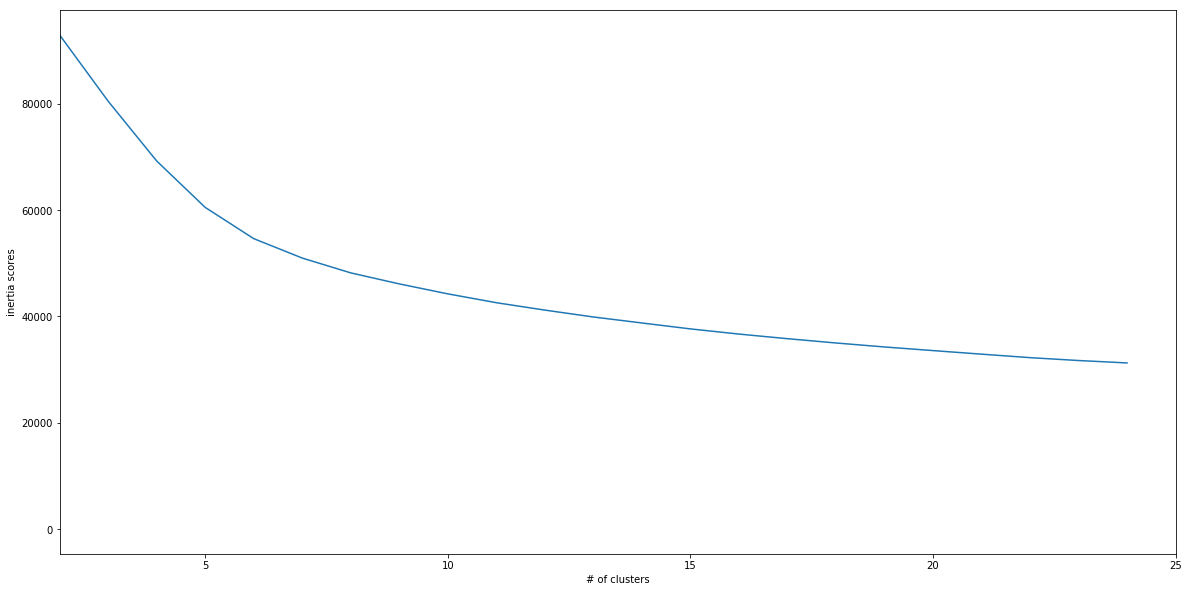

In [59]:
plt.figure(figsize=(20,10))
plt.plot(inertia)
plt.xlabel('# of clusters')
plt.xlim((2,25))
plt.ylabel('inertia scores')
#plt.ylim((650,1200))

In [60]:
# running cluster
k = 3
kmeans = KMeans(n_clusters=k, random_state=1)
kmeans.fit(lsa_tfidf_data_sclaed)
centers = kmeans.cluster_centers_.argsort()[:,::-1]
terms = tfidf_vectorizer.get_feature_names()

for i in range(0,k):
    word_list=[]
    print("cluster%d:"% i)
    for j in centers[i,:15]:
        word_list.append(terms[j])
    print(word_list)

cluster0:
['able try', 'absolutely', 'absolute', 'able wear', 'able']
cluster1:
['able', 'absolute', 'able wear', 'absolutely', 'able try']
cluster2:
['able wear', 'absolutely', 'able', 'able try', 'absolute']


In [64]:
tsne = TSNE(n_components=2, verbose=1, perplexity=92, n_iter=300)
X_ne = tsne.fit_transform(lsa_tfidf_data_sclaed[2000:])

figsize=(20,15)
plt.figure(dpi=300)
sns.scatterplot(X_ne[:, 0], X_ne[:, 1], hue=kmeans.labels_[2000:], alpha=0.5, size = 0.5, palette='rainbow', legend='full');

NameError: name 'TSNE' is not defined

In [65]:
import sklearn
from sklearn.manifold import TSNE

In [66]:
from sklearn.manifold import TSNE

[t-SNE] Computing 277 nearest neighbors...
[t-SNE] Indexed 20628 samples in 0.068s...
[t-SNE] Computed neighbors for 20628 samples in 4.024s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20628
[t-SNE] Computed conditional probabilities for sample 2000 / 20628
[t-SNE] Computed conditional probabilities for sample 3000 / 20628
[t-SNE] Computed conditional probabilities for sample 4000 / 20628
[t-SNE] Computed conditional probabilities for sample 5000 / 20628
[t-SNE] Computed conditional probabilities for sample 6000 / 20628
[t-SNE] Computed conditional probabilities for sample 7000 / 20628
[t-SNE] Computed conditional probabilities for sample 8000 / 20628
[t-SNE] Computed conditional probabilities for sample 9000 / 20628
[t-SNE] Computed conditional probabilities for sample 10000 / 20628
[t-SNE] Computed conditional probabilities for sample 11000 / 20628
[t-SNE] Computed conditional probabilities for sample 12000 / 20628
[t-SNE] Computed conditional probabilities for sa

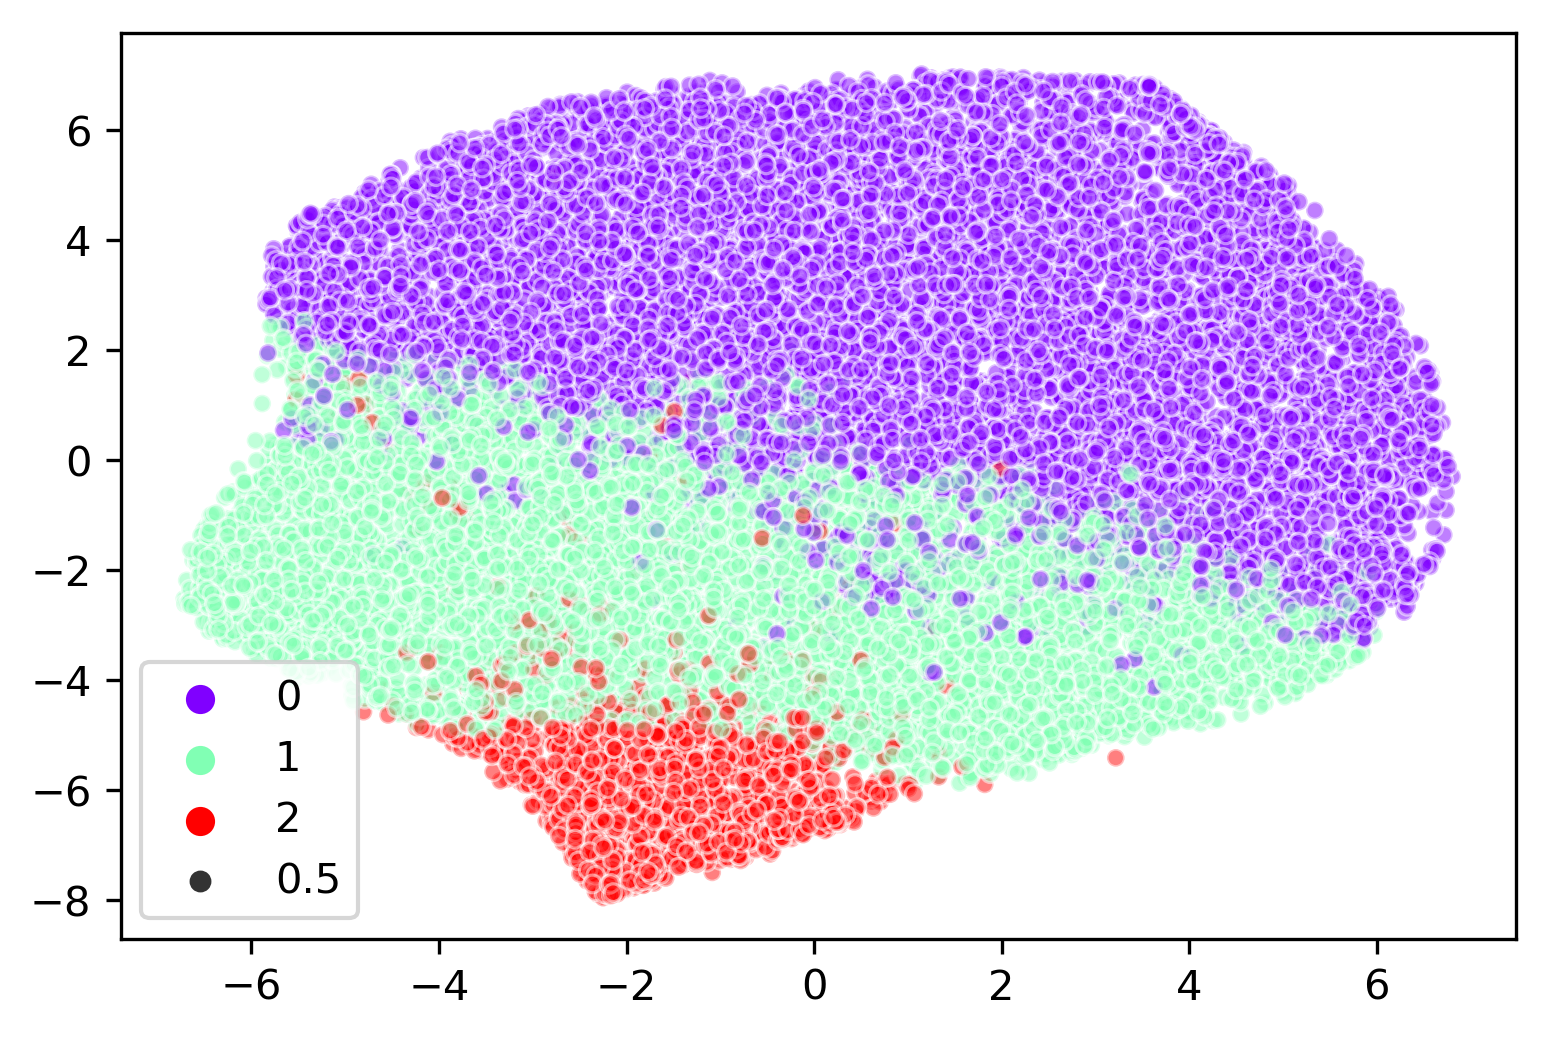

In [67]:
tsne = TSNE(n_components=2, verbose=1, perplexity=92, n_iter=300)
X_ne = tsne.fit_transform(lsa_tfidf_data_sclaed[2000:])

figsize=(20,15)
plt.figure(dpi=300)
sns.scatterplot(X_ne[:, 0], X_ne[:, 1], hue=kmeans.labels_[2000:], alpha=0.5, size = 0.5, palette='rainbow', legend='full');

In [68]:
for i in range(0,k):
    word_list=[]
    print("cluster%d:"% i)
    for j in centers[i,:15]:
        word_list.append(terms[j])
    print(word_list)

cluster0:
['able try', 'absolutely', 'absolute', 'able wear', 'able']
cluster1:
['able', 'absolute', 'able wear', 'absolutely', 'able try']
cluster2:
['able wear', 'absolutely', 'able', 'able try', 'absolute']


In [69]:
kmeans.labels_

array([0, 1, 1, ..., 0, 1, 0], dtype=int32)

In [70]:
indices_max = [index for index, value in enumerate(kmeans.labels_) if value==0]
for rev_index in indices_max[:5]:
    print(rev_index, str(df.ReviewText[rev_index]))
    print("\n")

0 Absolutely wonderful - silky and sexy and comfortable


3 I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!


4 This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!


6 I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet size (bummer, no petite). i decided to jkeep it though, because as i said, it matvehd everything. my ejans, pants, and the 3 skirts i waas trying on (of which i ]kept all ) oops.


11 This dress is perfection! so pretty and flattering.




In [71]:
indices_max = [index for index, value in enumerate(kmeans.labels_) if value==1]
for rev_index in indices_max[:5]:
    print(rev_index, str(df.ReviewText[rev_index]))
    print("\n")

1 Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.


2 I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c


5 I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but i

In [72]:
indices_max = [index for index, value in enumerate(kmeans.labels_) if value==2]
for rev_index in indices_max[:5]:
    print(rev_index, str(df.ReviewText[rev_index]))
    print("\n")

21 I'm upset because for the price of the dress, i thought it was embroidered! no, that is a print on the fabric. i think i cried a little when i opened the box. it is still ver pretty. i would say it is true to size, it is a tad bit big on me, but i am very tiny, but i can still get away with it. the color is vibrant. the style is unique. skirt portion is pretty poofy. i keep going back and forth on it mainly because of the price, although the quality is definitely there. except i wish it were emb


26 I have been waiting for this sweater coat to ship for weeks and i was so excited for it to arrive. this coat is not true to size and made me look short and squat. the sleeves are very wide (although long). as a light weight fall coat the sleeves don't need to be as wide because you wouldn't be layerng too much underneath. the buttons need to be moved at least three inches in for a nicer fit. i thought about redoing the buttons myself but the sleeves looked even more out of proportion wi

### nmf_tfidf

In [73]:
SSEs = []
Sil_coefs = []
for k in range(2,10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(nmf_tfidf_data_scaled)
    labels = km.labels_
    Sil_coefs.append(silhouette_score(nmf_tfidf_data_scaled, labels, metric='euclidean'))
    SSEs.append(km.inertia_)

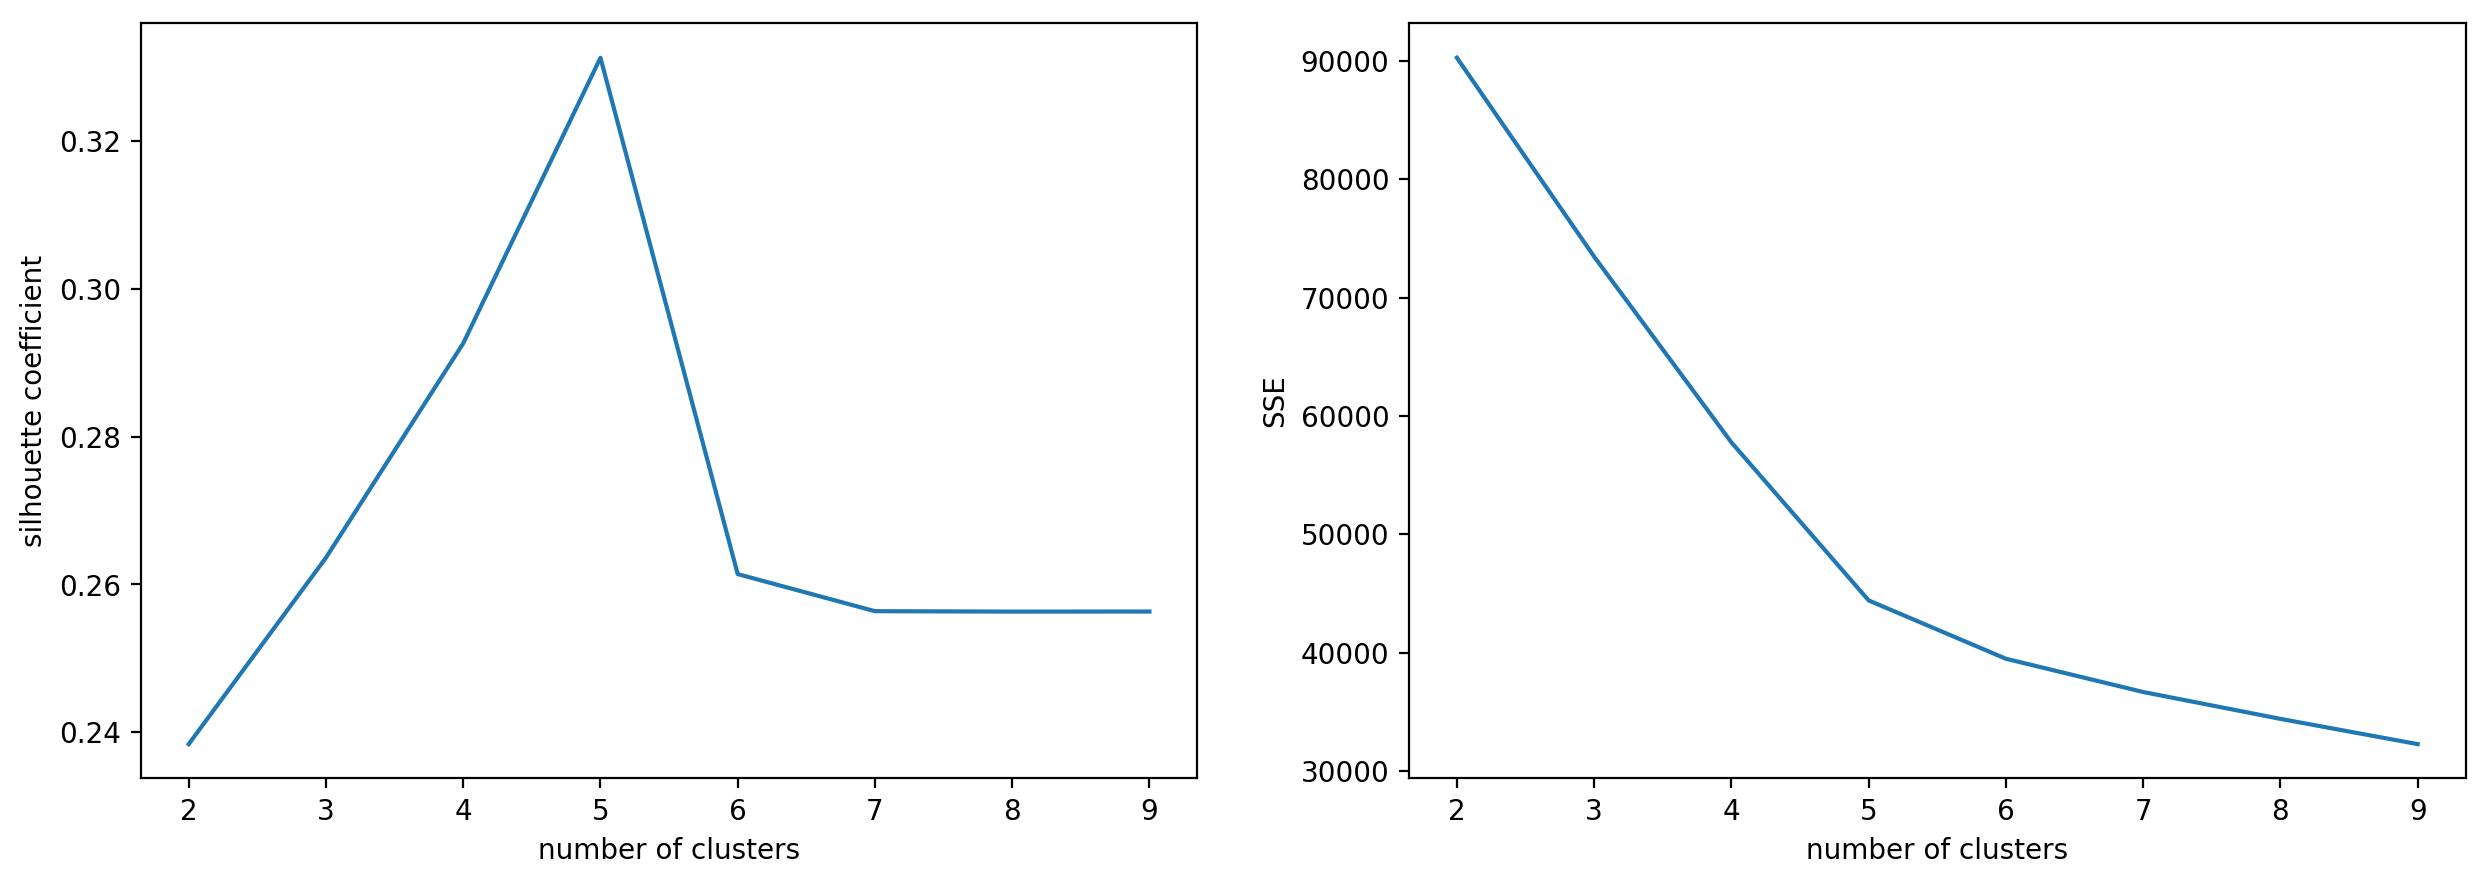

In [74]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True, dpi=200)
k_clusters = range(2,10)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')

# plot here on ax2
ax2.plot(k_clusters, SSEs)
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('SSE');

In [75]:
inertia = [0,0]

for n_clusters in range(2, 25):
    km = KMeans(n_clusters = n_clusters)
    km.fit(nmf_tfidf_data_scaled)
    msg = f"""# clusters: {n_clusters:2d}   Inertia: {km.inertia_:8.6f}"""
    inertia.append(km.inertia_)
    print(msg)

# clusters:  2   Inertia: 90278.077519
# clusters:  3   Inertia: 73474.572012
# clusters:  4   Inertia: 58291.063166
# clusters:  5   Inertia: 44420.864087
# clusters:  6   Inertia: 39491.426638
# clusters:  7   Inertia: 36681.560607
# clusters:  8   Inertia: 34409.954426
# clusters:  9   Inertia: 32449.793040
# clusters: 10   Inertia: 30344.824877
# clusters: 11   Inertia: 28609.405669
# clusters: 12   Inertia: 27244.296875
# clusters: 13   Inertia: 26150.483734
# clusters: 14   Inertia: 25073.947254
# clusters: 15   Inertia: 24020.057378
# clusters: 16   Inertia: 23130.802945
# clusters: 17   Inertia: 22438.749739
# clusters: 18   Inertia: 21845.858697
# clusters: 19   Inertia: 21234.891364
# clusters: 20   Inertia: 20666.964929
# clusters: 21   Inertia: 20121.961134
# clusters: 22   Inertia: 19569.293832
# clusters: 23   Inertia: 19060.141216
# clusters: 24   Inertia: 18743.265004


Text(0, 0.5, 'inertia scores')

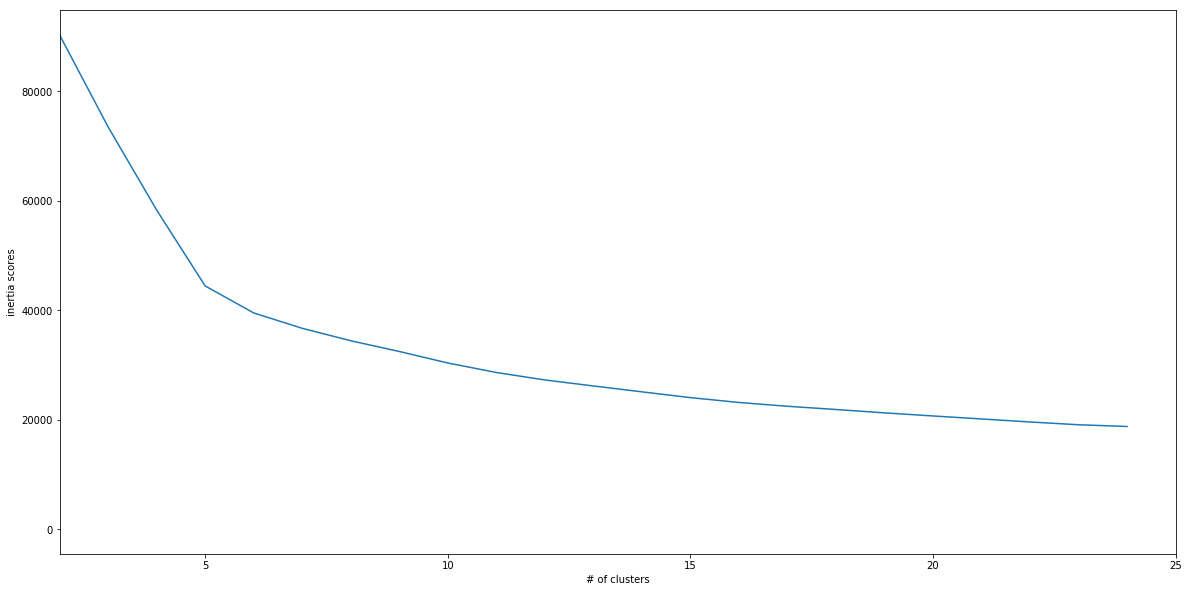

In [76]:
plt.figure(figsize=(20,10))
plt.plot(inertia)
plt.xlabel('# of clusters')
plt.xlim((2,25))
plt.ylabel('inertia scores')
#plt.ylim((650,1200))

In [77]:
# running cluster
k = 5
kmeans = KMeans(n_clusters=k, random_state=1)
kmeans.fit(nmf_tfidf_data_scaled)
centers = kmeans.cluster_centers_.argsort()[:,::-1]
terms = tfidf_vectorizer.get_feature_names()

for i in range(0,k):
    word_list=[]
    print("cluster%d:"% i)
    for j in centers[i,:15]:
        word_list.append(terms[j])
    print(word_list)

cluster0:
['absolute', 'able wear', 'absolutely', 'able try', 'able']
cluster1:
['absolutely', 'absolute', 'able wear', 'able try', 'able']
cluster2:
['able wear', 'absolutely', 'able try', 'absolute', 'able']
cluster3:
['able try', 'absolutely', 'able wear', 'absolute', 'able']
cluster4:
['able', 'absolutely', 'able wear', 'absolute', 'able try']


[t-SNE] Computing 277 nearest neighbors...
[t-SNE] Indexed 20628 samples in 0.169s...
[t-SNE] Computed neighbors for 20628 samples in 3.376s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20628
[t-SNE] Computed conditional probabilities for sample 2000 / 20628
[t-SNE] Computed conditional probabilities for sample 3000 / 20628
[t-SNE] Computed conditional probabilities for sample 4000 / 20628
[t-SNE] Computed conditional probabilities for sample 5000 / 20628
[t-SNE] Computed conditional probabilities for sample 6000 / 20628
[t-SNE] Computed conditional probabilities for sample 7000 / 20628
[t-SNE] Computed conditional probabilities for sample 8000 / 20628
[t-SNE] Computed conditional probabilities for sample 9000 / 20628
[t-SNE] Computed conditional probabilities for sample 10000 / 20628
[t-SNE] Computed conditional probabilities for sample 11000 / 20628
[t-SNE] Computed conditional probabilities for sample 12000 / 20628
[t-SNE] Computed conditional probabilities for sa

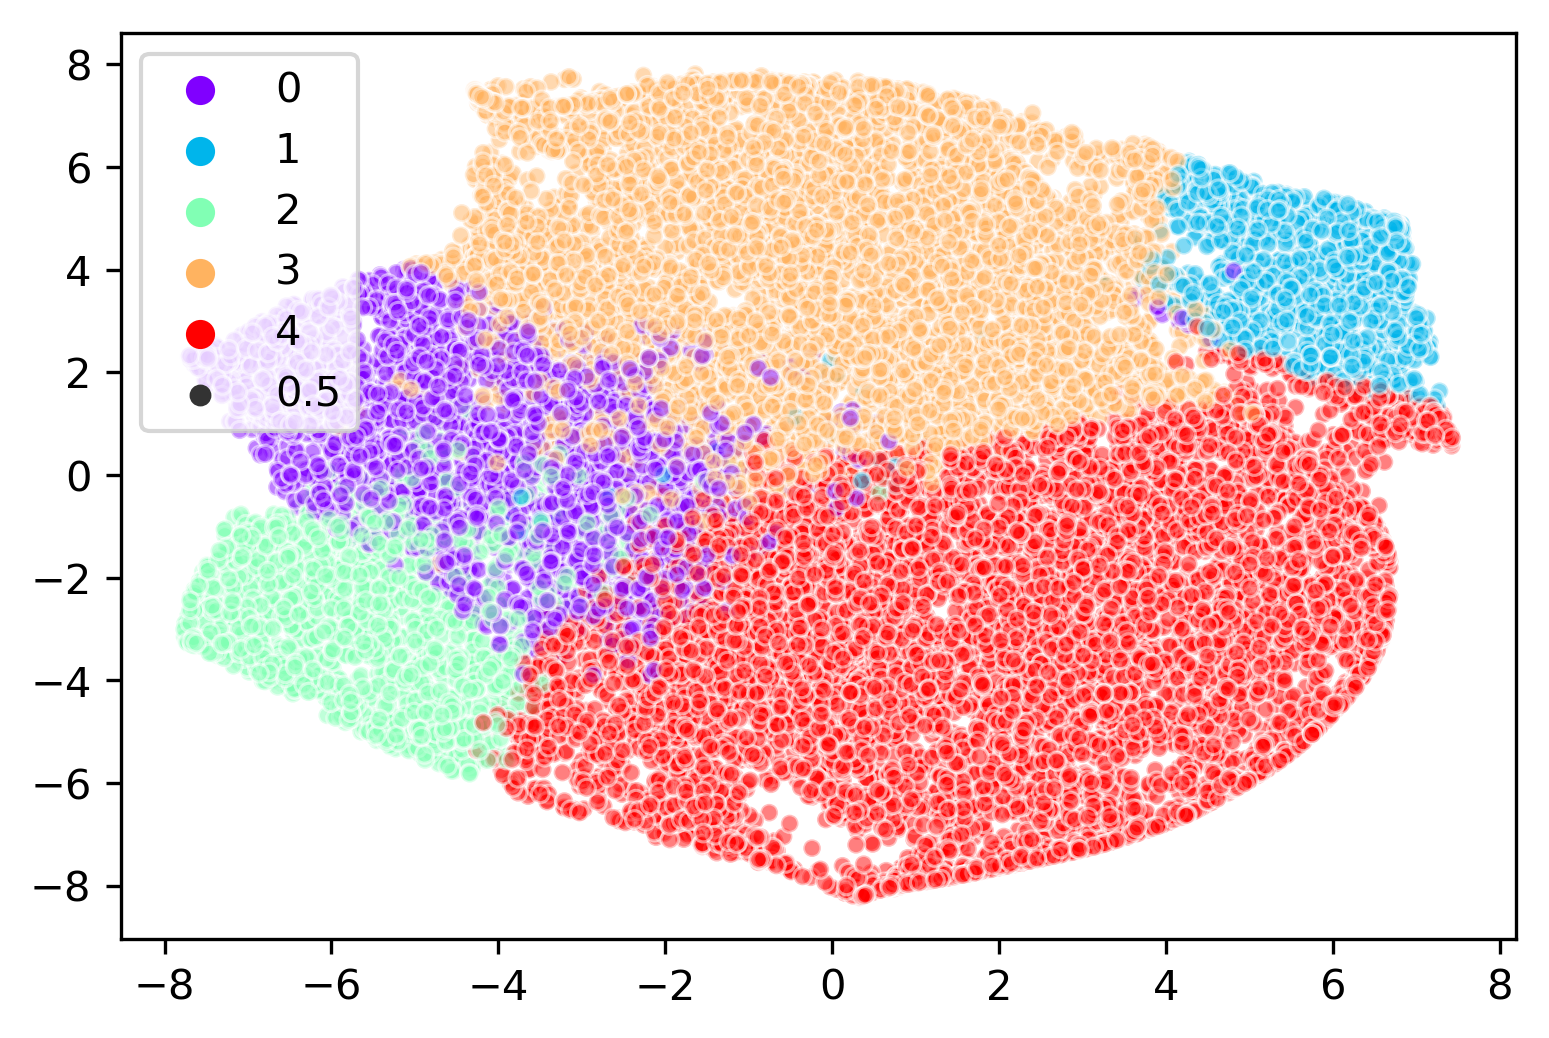

In [78]:
tsne = TSNE(n_components=2, verbose=1, perplexity=92, n_iter=300)
X_ne = tsne.fit_transform(nmf_tfidf_data_scaled[2000:])

figsize=(20,15)
plt.figure(dpi=300)
sns.scatterplot(X_ne[:, 0], X_ne[:, 1], hue=kmeans.labels_[2000:], alpha=0.5, size = 0.5, palette='rainbow', legend='full');

In [79]:
# running cluster
k = 6
kmeans = KMeans(n_clusters=k, random_state=1)
kmeans.fit(nmf_tfidf_data_scaled)
centers = kmeans.cluster_centers_.argsort()[:,::-1]
terms = tfidf_vectorizer.get_feature_names()

for i in range(0,k):
    word_list=[]
    print("cluster%d:"% i)
    for j in centers[i,:15]:
        word_list.append(terms[j])
    print(word_list)

cluster0:
['able wear', 'absolutely', 'able try', 'absolute', 'able']
cluster1:
['absolute', 'able wear', 'absolutely', 'able try', 'able']
cluster2:
['absolutely', 'absolute', 'able wear', 'able try', 'able']
cluster3:
['able', 'absolutely', 'able wear', 'absolute', 'able try']
cluster4:
['able try', 'absolutely', 'able wear', 'absolute', 'able']
cluster5:
['able try', 'able', 'absolutely', 'able wear', 'absolute']


[t-SNE] Computing 277 nearest neighbors...
[t-SNE] Indexed 20628 samples in 0.188s...
[t-SNE] Computed neighbors for 20628 samples in 3.981s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20628
[t-SNE] Computed conditional probabilities for sample 2000 / 20628
[t-SNE] Computed conditional probabilities for sample 3000 / 20628
[t-SNE] Computed conditional probabilities for sample 4000 / 20628
[t-SNE] Computed conditional probabilities for sample 5000 / 20628
[t-SNE] Computed conditional probabilities for sample 6000 / 20628
[t-SNE] Computed conditional probabilities for sample 7000 / 20628
[t-SNE] Computed conditional probabilities for sample 8000 / 20628
[t-SNE] Computed conditional probabilities for sample 9000 / 20628
[t-SNE] Computed conditional probabilities for sample 10000 / 20628
[t-SNE] Computed conditional probabilities for sample 11000 / 20628
[t-SNE] Computed conditional probabilities for sample 12000 / 20628
[t-SNE] Computed conditional probabilities for sa

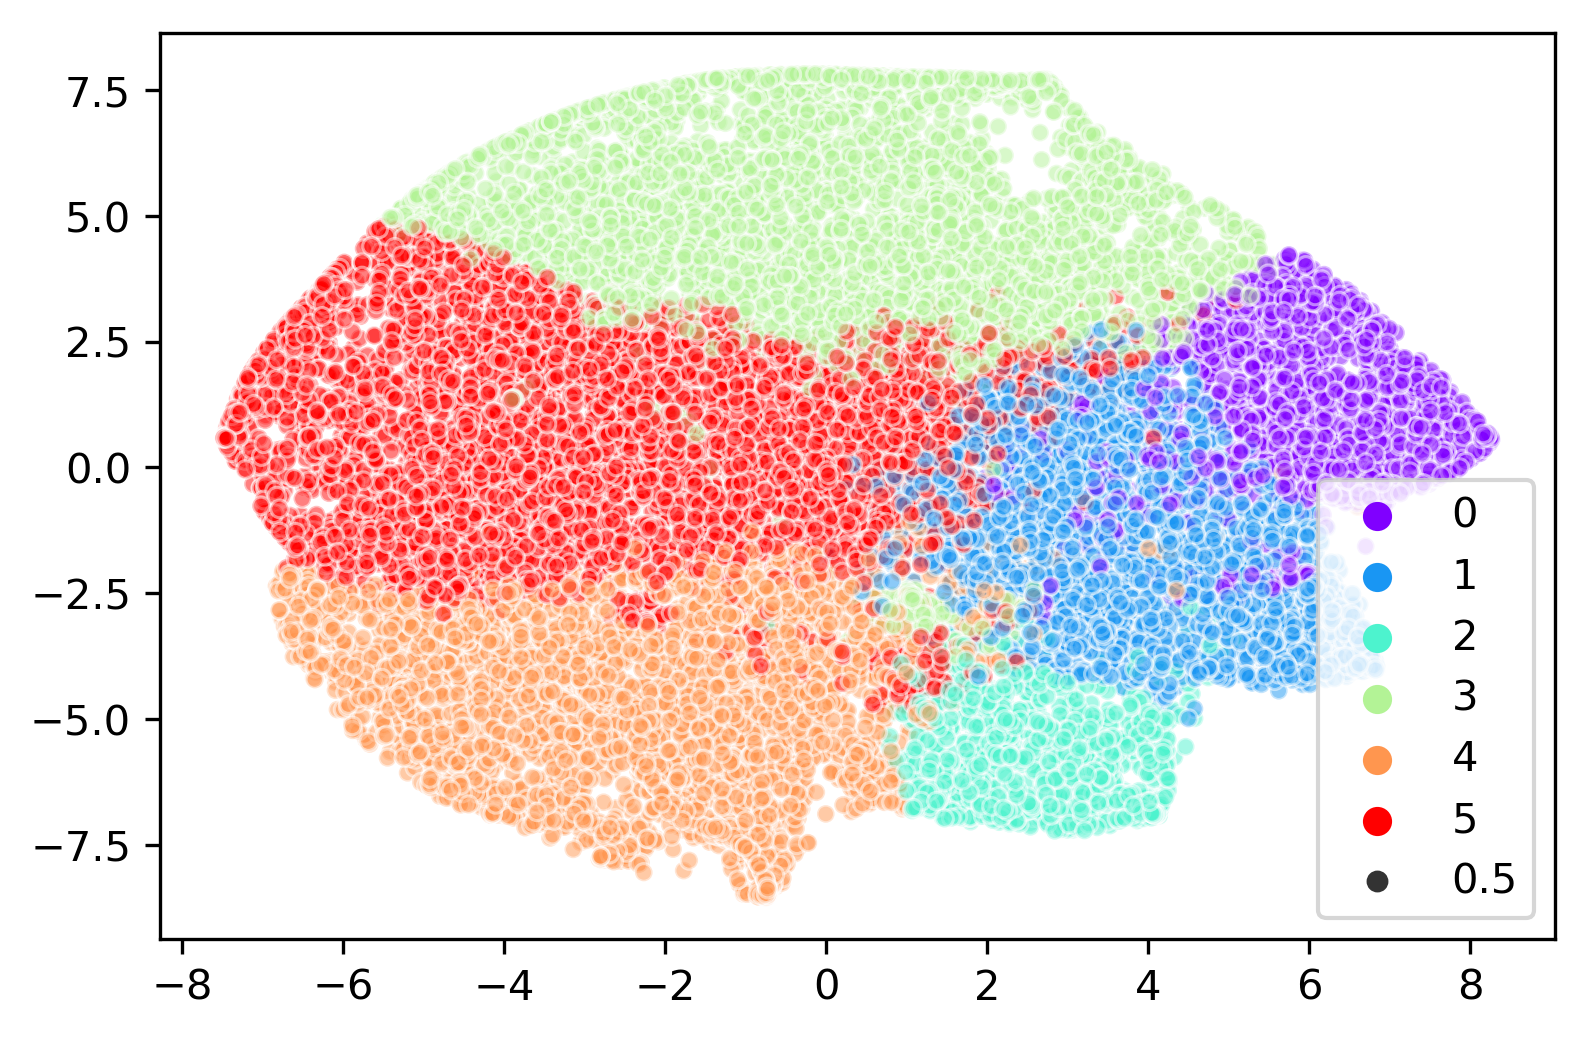

In [80]:
tsne = TSNE(n_components=2, verbose=1, perplexity=92, n_iter=300)
X_ne = tsne.fit_transform(nmf_tfidf_data_scaled[2000:])

figsize=(20,15)
plt.figure(dpi=300)
sns.scatterplot(X_ne[:, 0], X_ne[:, 1], hue=kmeans.labels_[2000:], alpha=0.5, size = 0.5, palette='rainbow', legend='full');

In [81]:
indices_max = [index for index, value in enumerate(kmeans.labels_) if value==3]
for rev_index in indices_max[:5]:
    print(rev_index, str(df.ReviewText[rev_index]))
    print("\n")

1 Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.


5 I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.


6 I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and 

### more grams

In [82]:
# initialize vectorizers
count_vectorizer = CountVectorizer(ngram_range=(1, 3),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6, max_features=4000)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6, max_features=4000)

# transfomred my text data using vectorizers
cv_data = count_vectorizer.fit_transform(df.ReviewTextLower)
tfidf_data = tfidf_vectorizer.fit_transform(df.ReviewTextLower)

In [83]:
# initialized reducers with dimensions
n_comp = 5
lsa_tfidf = TruncatedSVD(n_components=n_comp)
lsa_cv = TruncatedSVD(n_components=n_comp)
nmf_tfidf = NMF(n_components=n_comp)
nmf_cv = NMF(n_components=n_comp)

# transformed my vectorizers data using reducers
lsa_tfidf_data = lsa_tfidf.fit_transform(tfidf_data)
lsa_cv_data = lsa_cv.fit_transform(cv_data)
nmf_tfidf_data = nmf_tfidf.fit_transform(tfidf_data)
nmf_cv_data = nmf_cv.fit_transform(cv_data)

In [84]:
# initialize standardscaler
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

# transform my reducer data using standardscaler
lsa_tfidf_data_sclaed = SS.fit_transform(lsa_tfidf_data)
lsa_cv_data_sclaed = SS.fit_transform(lsa_cv_data)
nmf_tfidf_data_scaled = SS.fit_transform(nmf_tfidf_data)
nmf_cv_data_scaled = SS.fit_transform(nmf_cv_data)

In [85]:
SSEs = []
Sil_coefs = []
for k in range(2,10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(nmf_tfidf_data_scaled)
    labels = km.labels_
    Sil_coefs.append(silhouette_score(nmf_tfidf_data_scaled, labels, metric='euclidean'))
    SSEs.append(km.inertia_)

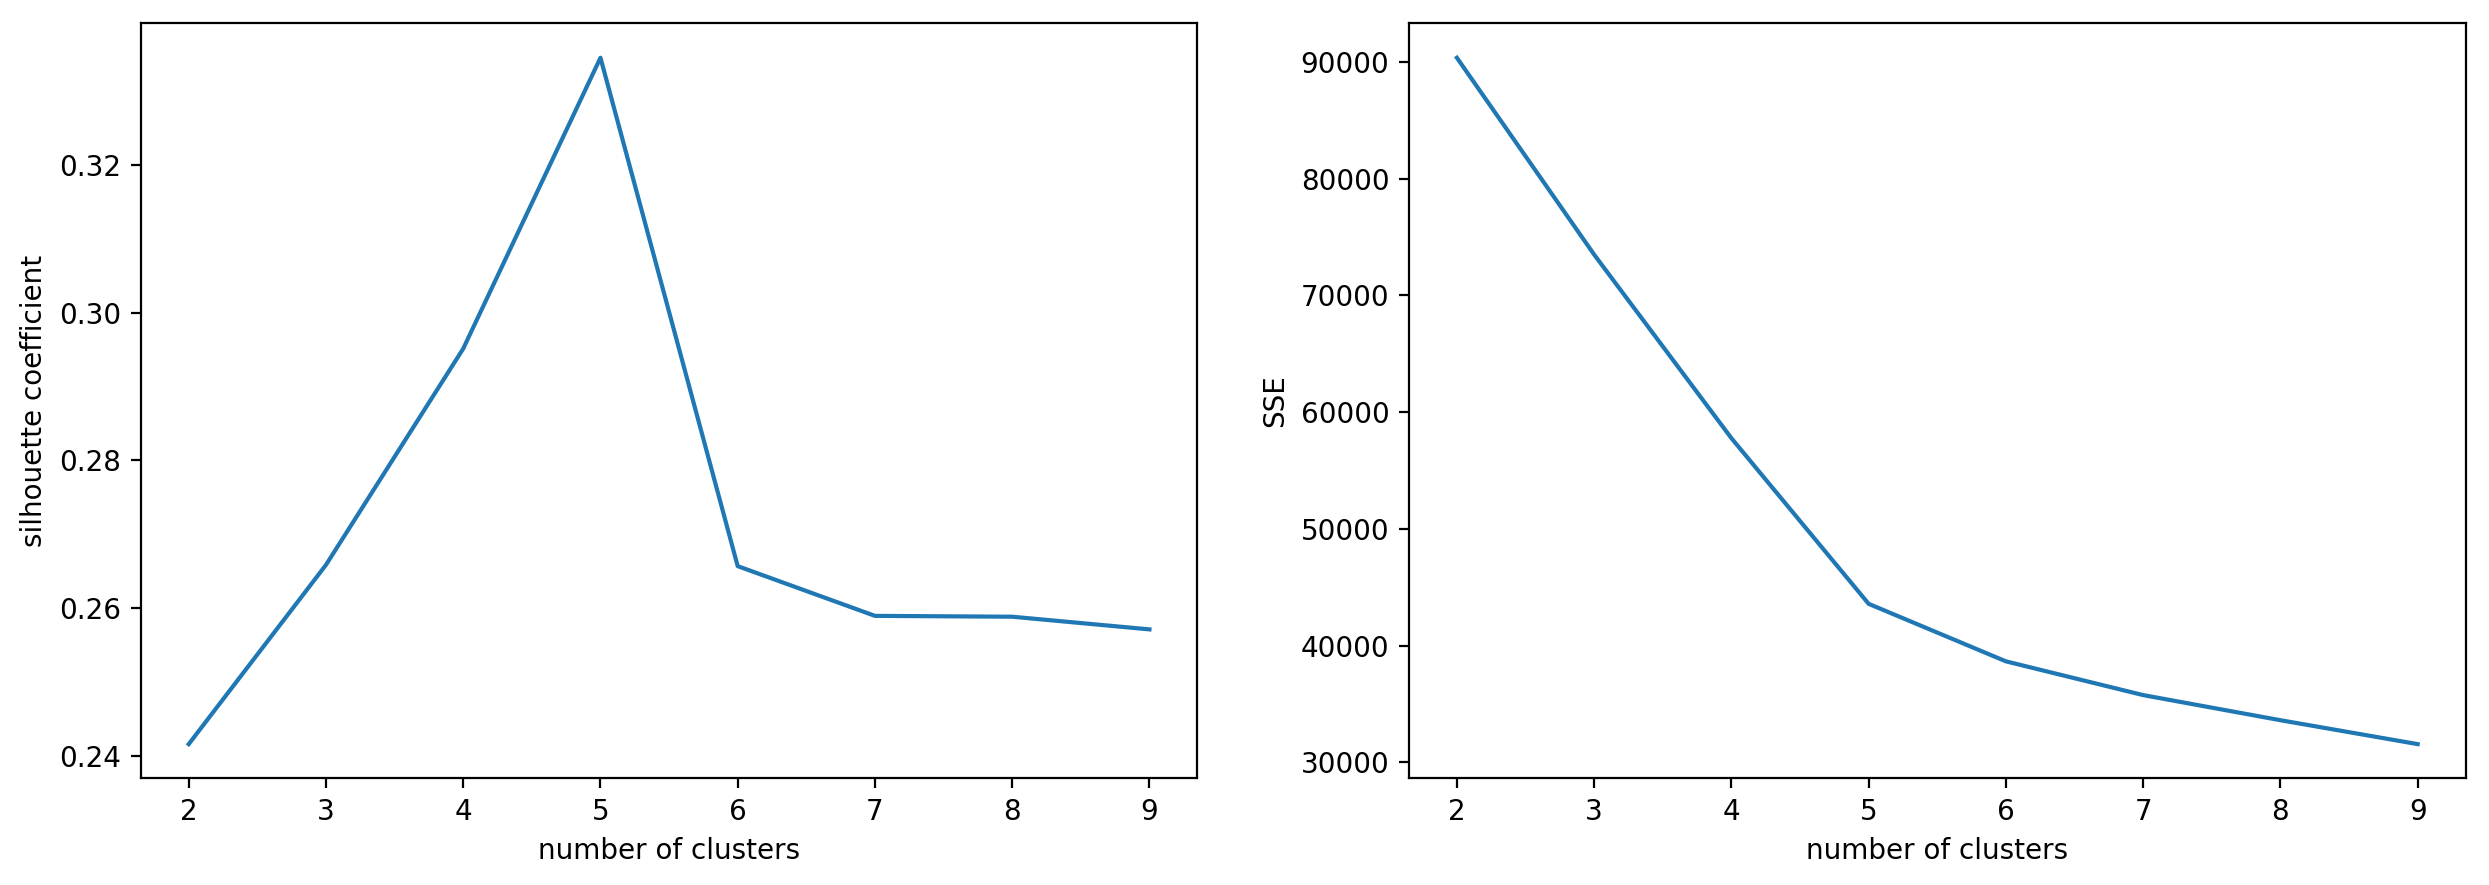

In [86]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True, dpi=200)
k_clusters = range(2,10)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')

# plot here on ax2
ax2.plot(k_clusters, SSEs)
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('SSE');

In [87]:
inertia = [0,0]

for n_clusters in range(2, 25):
    km = KMeans(n_clusters = n_clusters)
    km.fit(nmf_tfidf_data_scaled)
    msg = f"""# clusters: {n_clusters:2d}   Inertia: {km.inertia_:8.6f}"""
    inertia.append(km.inertia_)
    print(msg)

# clusters:  2   Inertia: 90344.160342
# clusters:  3   Inertia: 73483.877003
# clusters:  4   Inertia: 58698.061658
# clusters:  5   Inertia: 43570.283496
# clusters:  6   Inertia: 38642.731722
# clusters:  7   Inertia: 35753.394937
# clusters:  8   Inertia: 33685.975580
# clusters:  9   Inertia: 31554.959974
# clusters: 10   Inertia: 29616.126332
# clusters: 11   Inertia: 27806.489822
# clusters: 12   Inertia: 26449.237737
# clusters: 13   Inertia: 25386.066193
# clusters: 14   Inertia: 24434.859371
# clusters: 15   Inertia: 23532.561247
# clusters: 16   Inertia: 22686.685162
# clusters: 17   Inertia: 22061.109416
# clusters: 18   Inertia: 21279.062264
# clusters: 19   Inertia: 20709.136644
# clusters: 20   Inertia: 20103.684332
# clusters: 21   Inertia: 19511.686909
# clusters: 22   Inertia: 19011.142700
# clusters: 23   Inertia: 18542.895951
# clusters: 24   Inertia: 18110.018639


Text(0, 0.5, 'inertia scores')

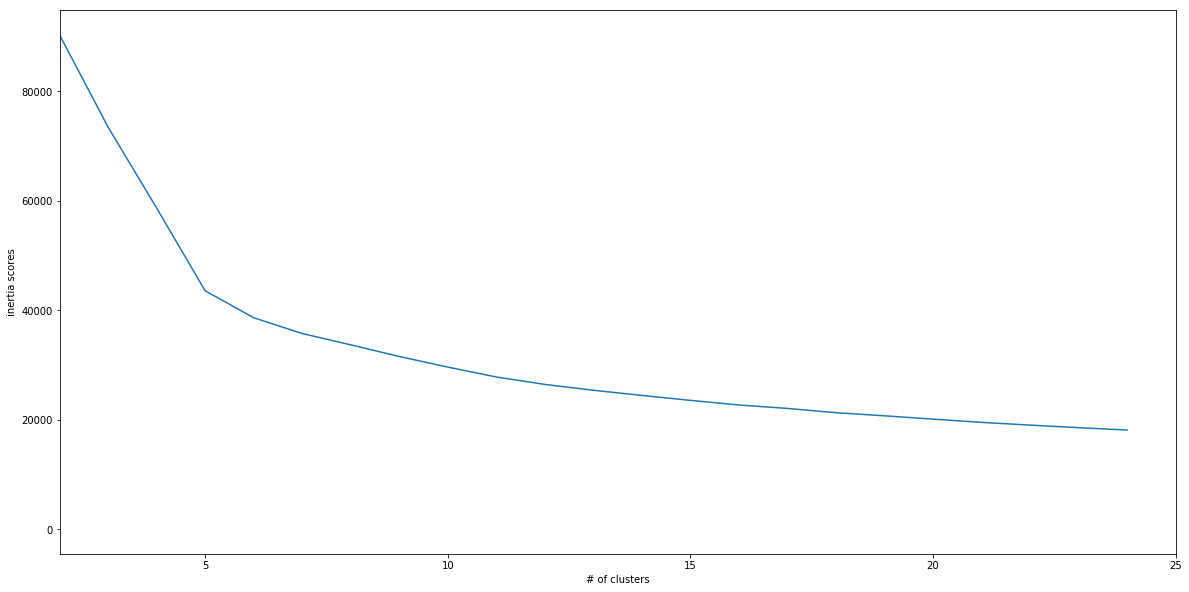

In [88]:
plt.figure(figsize=(20,10))
plt.plot(inertia)
plt.xlabel('# of clusters')
plt.xlim((2,25))
plt.ylabel('inertia scores')
#plt.ylim((650,1200))

In [89]:
# running cluster
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(nmf_tfidf_data_scaled)
centers = kmeans.cluster_centers_.argsort()[:,::-1]
terms = tfidf_vectorizer.get_feature_names()

for i in range(0,k):
    word_list=[]
    print("cluster%d:"% i)
    for j in centers[i,:15]:
        word_list.append(terms[j])
    print(word_list)

cluster0:
['able wear', 'able try', 'absolutely', 'absolute', 'able']
cluster1:
['absolutely', 'absolute', 'able wear', 'able try', 'able']
cluster2:
['able try', 'absolutely', 'able wear', 'absolute', 'able']
cluster3:
['absolute', 'able wear', 'absolutely', 'able try', 'able']
cluster4:
['able', 'absolutely', 'able wear', 'absolute', 'able try']


[t-SNE] Computing 277 nearest neighbors...
[t-SNE] Indexed 20628 samples in 0.169s...
[t-SNE] Computed neighbors for 20628 samples in 3.540s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20628
[t-SNE] Computed conditional probabilities for sample 2000 / 20628
[t-SNE] Computed conditional probabilities for sample 3000 / 20628
[t-SNE] Computed conditional probabilities for sample 4000 / 20628
[t-SNE] Computed conditional probabilities for sample 5000 / 20628
[t-SNE] Computed conditional probabilities for sample 6000 / 20628
[t-SNE] Computed conditional probabilities for sample 7000 / 20628
[t-SNE] Computed conditional probabilities for sample 8000 / 20628
[t-SNE] Computed conditional probabilities for sample 9000 / 20628
[t-SNE] Computed conditional probabilities for sample 10000 / 20628
[t-SNE] Computed conditional probabilities for sample 11000 / 20628
[t-SNE] Computed conditional probabilities for sample 12000 / 20628
[t-SNE] Computed conditional probabilities for sa

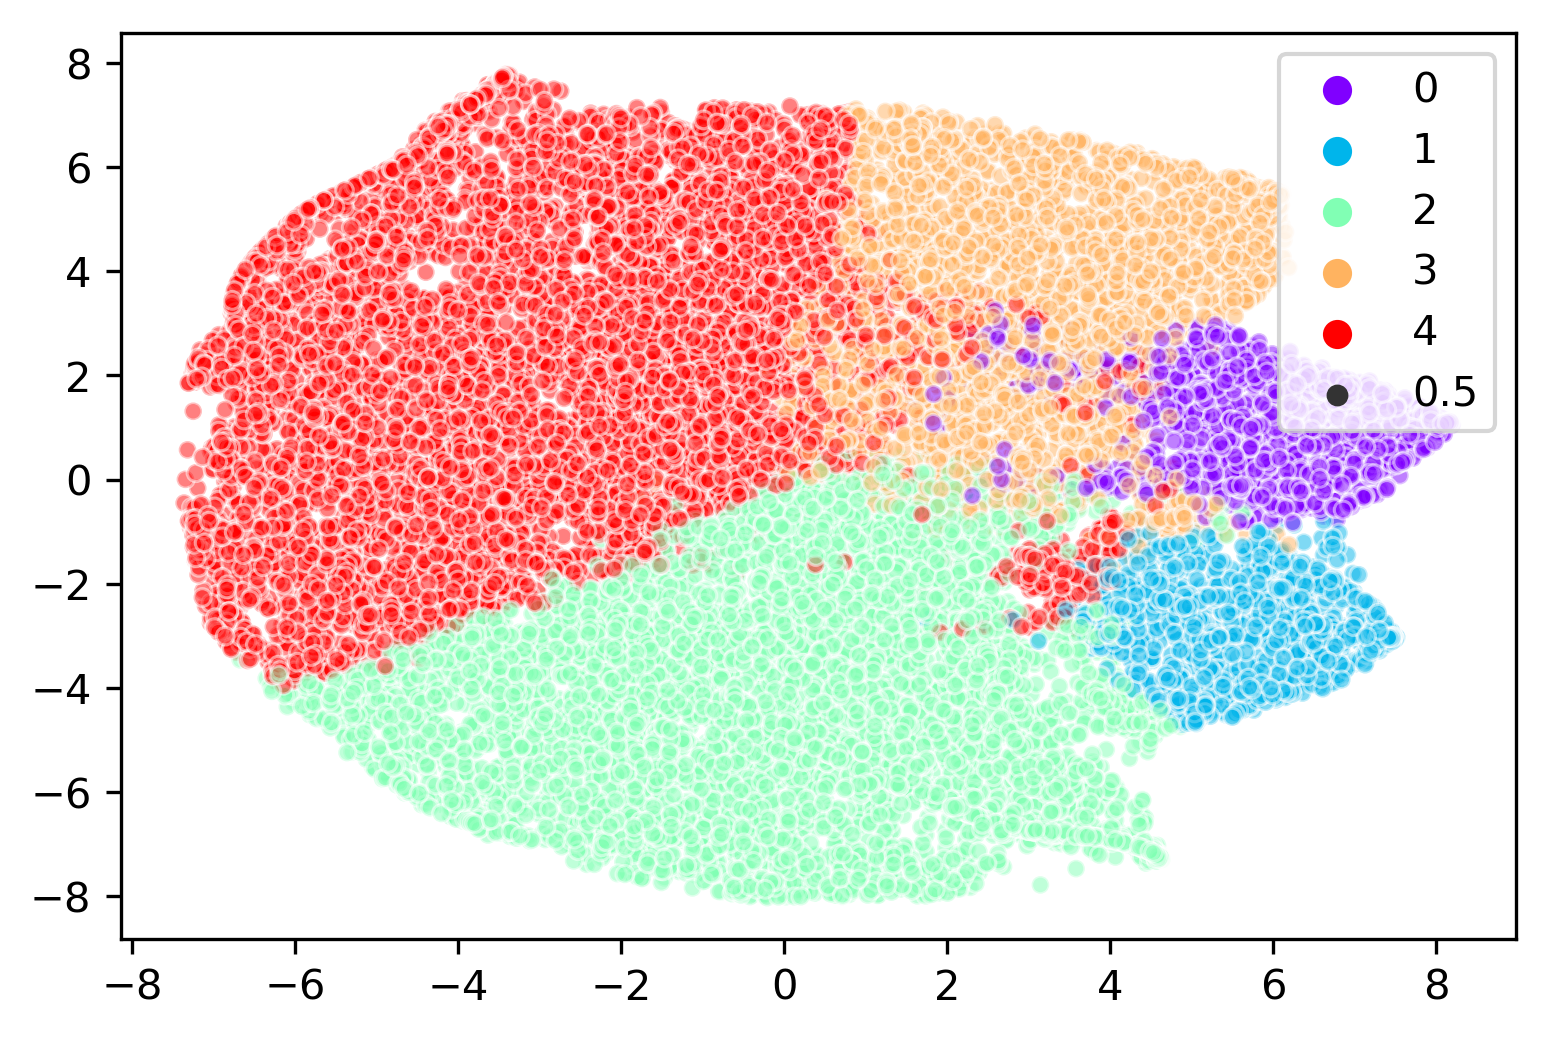

In [90]:
tsne = TSNE(n_components=2, verbose=1, perplexity=92, n_iter=300, random_state=42)
X_ne = tsne.fit_transform(nmf_tfidf_data_scaled[2000:])

figsize=(20,15)
plt.figure(dpi=300)
sns.scatterplot(X_ne[:, 0], X_ne[:, 1], hue=kmeans.labels_[2000:], alpha=0.5, size = 0.5, palette='rainbow', legend='full');

In [91]:
indices_max = [index for index, value in enumerate(kmeans.labels_) if value==0]
for rev_index in indices_max[:5]:
    print(rev_index, str(df.ReviewText[rev_index]))
    print("\n")

21 I'm upset because for the price of the dress, i thought it was embroidered! no, that is a print on the fabric. i think i cried a little when i opened the box. it is still ver pretty. i would say it is true to size, it is a tad bit big on me, but i am very tiny, but i can still get away with it. the color is vibrant. the style is unique. skirt portion is pretty poofy. i keep going back and forth on it mainly because of the price, although the quality is definitely there. except i wish it were emb


105 I bought this lovely silk/velvet shirt in the &quot;sky&quot; color but it is more on the teal blue side than sky blue, which disappointed me. it is definitely darker than appears in photo. still a luxurious well-made beauty with sassy appeal. it drapes like a snake slithering down your body. it comes with attitude.


110 This is so thin and poor quality. especially for the price. it felt like a thin pajama top. the buttons are terrible little shell buttons. this could not have been re

In [92]:
indices_max = [index for index, value in enumerate(kmeans.labels_) if value==3]
for rev_index in indices_max[:5]:
    print(rev_index, str(df.ReviewText[rev_index]))
    print("\n")

2 I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c


8 I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.


9 I'm 5"5' and 125 lbs. i ordered the s petite to make sure the length wasn't too long. i typically wear an xs regular in retailer dresses. if you're less busty (34b cup or smaller), a s petite will fit you perfectly (snug, but not tight). i love that i could dress it up for a party, or down for work. i love that the tulle

In [93]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from collections import Counter
from imblearn.over_sampling import SMOTE

/Users/harshil/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/harshil/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/harshil/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in versi

#### Understand what are the distribution of each rank

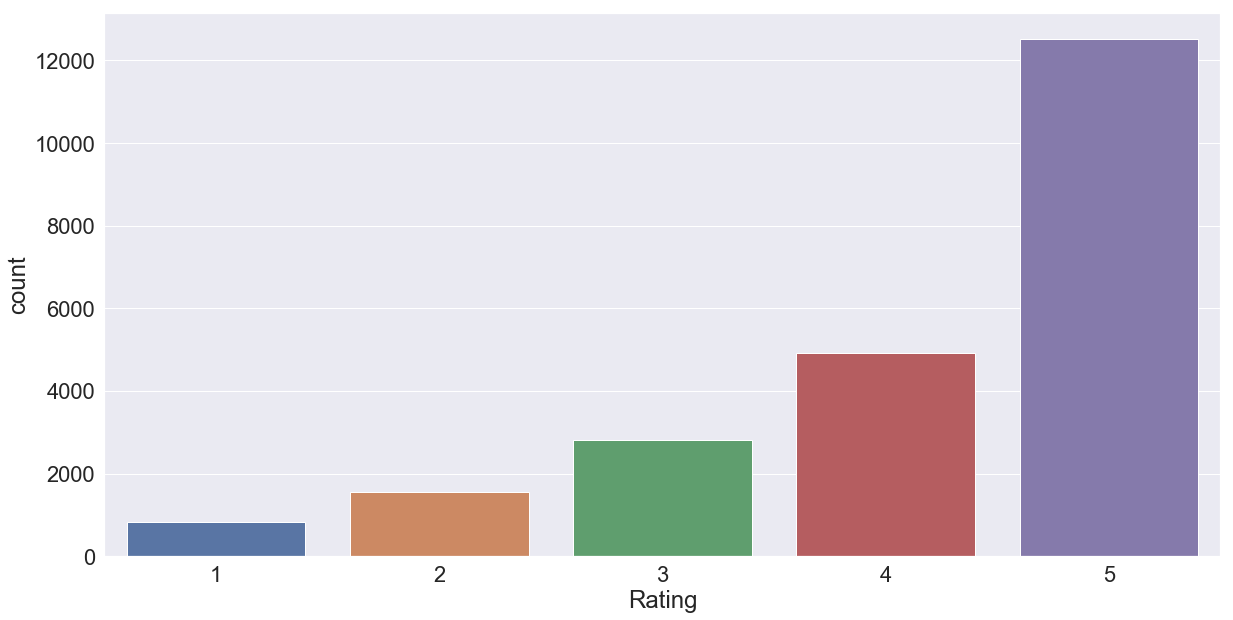

In [94]:
plt.figure(figsize=(20,10))
sns.set(font_scale = 2)
sns.countplot(df.Rating)

### Perform more cleaning

In [95]:
words_to_remove = ['love', 'dress', 'dresses', 'zip', 'zipper', 'fit', 'zippers', 'young', 'younger', 'pants', 'years']
text = 'I love things about dresses but not dress.'

import re
pattern = [f'(\\b{word}\\b)' for word in words_to_remove]
pattern = '|'.join(pattern)
re.sub(pattern, '', text)

'I  things about  but not .'

In [96]:
df['ReviewTextLower'] = df.ReviewText

In [97]:
df['ReviewTextLower'] = df.ReviewTextLower.str.lower()

In [98]:
df['ReviewTextLower'].replace(to_replace=pattern, value='', regex=True, inplace=True)

In [99]:

df.head()

Age                                         ReviewText  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it's sooo pretty.  i happene...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it's fun, fl...       5   
4   47  This shirt is very flattering to all due to th...       5   

   RecommendedIND  PositiveFeedbackCount    DivisionName DepartmentName  \
0               1                      0       Initmates       Intimate   
1               1                      4         General        Dresses   
2               0                      0         General        Dresses   
3               1                      0  General Petite        Bottoms   
4               1                      6         General           Tops   

   ClassName                                       CombinedText  \
0  Intimates   Absolutely wonderful - silky and sexy and com...   
1    Dresses   Love this dress!  it's sooo pretty.  i happen...   
2    Dresses  Some major design flaws I had such high hopes ...   
3      Pants  My favorite buy! I love, love, love this jumps...   
4    Blouses  Flattering shirt This shirt is very flattering...   

                                     ReviewTextLower  
0  absolutely wonderful - silky and sexy and comf...  
1   this !  it's sooo pretty.  i happened to find...  
2  i had such high hopes for this  and really wan...  
3  i , ,  this jumpsuit. it's fun, flirty, and fa...  
4  this shirt is very flattering to all due to th...

### Group different ranks together as my target rank

In [100]:
df['ModifiedRating'] = df.Rating.replace([2, 3, 4], 1)

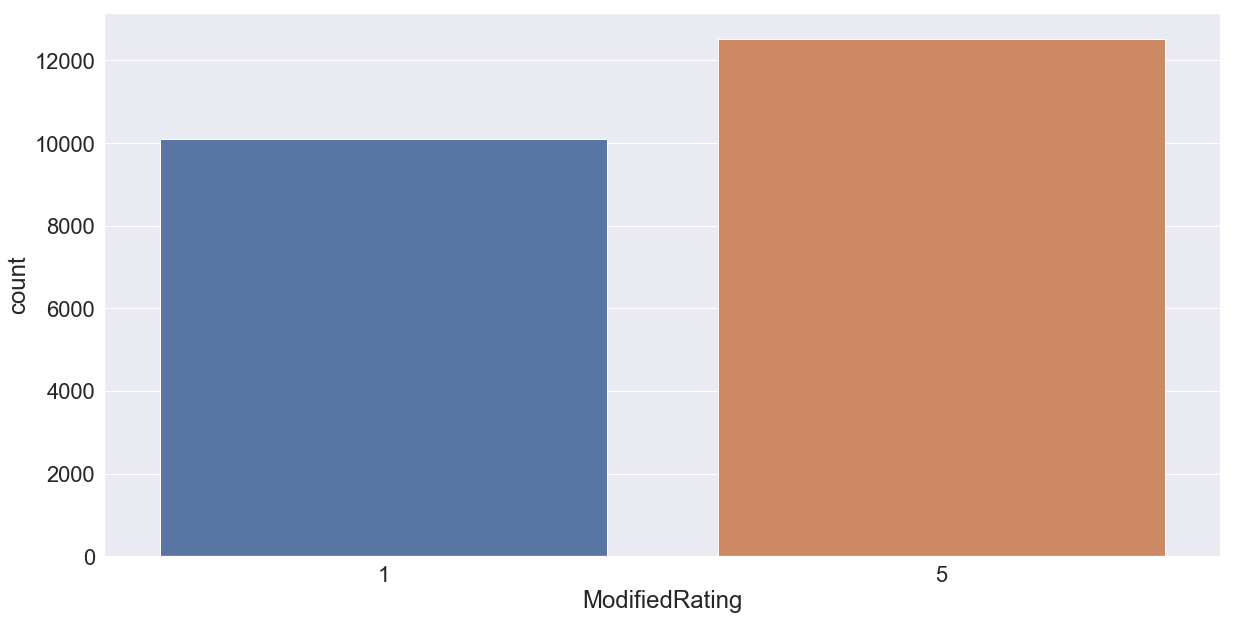

In [101]:
sns.set(font_scale = 2)
plt.figure(figsize=(20,10))
sns.countplot(df.ModifiedRating)

In [102]:
df.head()

Age                                         ReviewText  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it's sooo pretty.  i happene...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it's fun, fl...       5   
4   47  This shirt is very flattering to all due to th...       5   

   RecommendedIND  PositiveFeedbackCount    DivisionName DepartmentName  \
0               1                      0       Initmates       Intimate   
1               1                      4         General        Dresses   
2               0                      0         General        Dresses   
3               1                      0  General Petite        Bottoms   
4               1                      6         General           Tops   

   ClassName                                       CombinedText  \
0  Intimates   Absolutely wonderful - silky and sexy and com...   
1    Dresses   Love this dress!  it's sooo pretty.  i happen...   
2    Dresses  Some major design flaws I had such high hopes ...   
3      Pants  My favorite buy! I love, love, love this jumps...   
4    Blouses  Flattering shirt This shirt is very flattering...   

                                     ReviewTextLower  ModifiedRating  
0  absolutely wonderful - silky and sexy and comf...               1  
1   this !  it's sooo pretty.  i happened to find...               5  
2  i had such high hopes for this  and really wan...               1  
3  i , ,  this jumpsuit. it's fun, flirty, and fa...               5  
4  this shirt is very flattering to all due to th...               5

In [103]:
len(df[df.ModifiedRating == 1])

10101

In [104]:
len(df[df.ModifiedRating == 5])

12527

### Above Two classes are not too imbalance and is in a safe range.

### Build different classification models

#### Using ReviewTextLower column

In [105]:
# using ReviewTextLower column as my predictors
# using ModifiedRating column as my target variable
X = df['ReviewTextLower']
y = df['ModifiedRating']

In [106]:
# vectorization
count_vectorizer = CountVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6)

# transform my predictors
cv_data = count_vectorizer.fit_transform(X)
tfidf_data = tfidf_vectorizer.fit_transform(X)

In [107]:
len(count_vectorizer.vocabulary_)

254500

In [108]:
# split my data to 70/30 
X_train, X_test, y_train, y_test = train_test_split(cv_data, y, test_size=0.3, random_state=42)

In [109]:
# train with multinomail Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [110]:
# make prediction
y_pred = nb.predict(X_test)

In [111]:
# print out confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[2129  896]
 [ 462 3302]]


              precision    recall  f1-score   support

           1       0.82      0.70      0.76      3025
           5       0.79      0.88      0.83      3764

    accuracy                           0.80      6789
   macro avg       0.80      0.79      0.79      6789
weighted avg       0.80      0.80      0.80      6789



In [112]:
# trying to make a prediction using this review
# this is an example for positive review
positive_example = df['ReviewTextLower'][1]
positive_example

' this !  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i  the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.'

In [113]:
# vectorize the positive_example
positive_example_vec = count_vectorizer.transform([positive_example])
# make prediction
nb.predict(positive_example_vec)[0]

5

In [114]:
# trying to make a prediction using an negative review
negative_example = df['ReviewTextLower'][5]
negative_example

'i  tracy reese , but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this  was very pretty out of the package but its a lot of . the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i  the color and the idea of the style but it just did not work on me. i returned this .'

In [115]:
negative_example_vec = count_vectorizer.transform([negative_example])
nb.predict(negative_example_vec)[0]

1

In [116]:
negative_example = df['ReviewTextLower'][10]
negative_example

' runs small esp where the  area runs. i ordered the sp which typically fits me and it was very tight! the material on the top looks and feels very cheap that even just pulling on it will cause it to rip the fabric. pretty disappointed as it was going to be my christmas  this year! needless to say it will be going back.'

In [118]:
negative_example_vec = count_vectorizer.transform([negative_example])
#nb.predict(negative_example_transformed)[0]

### Using Combinetext column

In [119]:
df['CombinedTextLower'] = df.CombinedText

In [120]:

df['CombinedTextLower'] = df.CombinedTextLower.str.lower()

In [121]:
df['CombinedTextLower'].replace(to_replace=pattern, value='', regex=True, inplace=True)

In [122]:
X = df.CombinedTextLower
y = df.ModifiedRating

In [123]:
count_vectorizer = CountVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6)

cv_data = count_vectorizer.fit_transform(X)
tfidf_data = tfidf_vectorizer.fit_transform(X)

In [124]:
len(count_vectorizer.vocabulary_)

267875

In [125]:
X_train, X_test, y_train, y_test = train_test_split(cv_data, y, test_size=0.3, random_state=42)

In [126]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [127]:
y_pred = nb.predict(X_test)

In [128]:
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[2177  848]
 [ 424 3340]]


              precision    recall  f1-score   support

           1       0.84      0.72      0.77      3025
           5       0.80      0.89      0.84      3764

    accuracy                           0.81      6789
   macro avg       0.82      0.80      0.81      6789
weighted avg       0.82      0.81      0.81      6789



In [130]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train, y_train)

/Users/harshil/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [131]:
y_pred = logit.predict(X_test)

In [132]:
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[2249  776]
 [ 554 3210]]


              precision    recall  f1-score   support

           1       0.80      0.74      0.77      3025
           5       0.81      0.85      0.83      3764

    accuracy                           0.80      6789
   macro avg       0.80      0.80      0.80      6789
weighted avg       0.80      0.80      0.80      6789



In [133]:
df.ReviewText[23]

"Cute little dress fits tts. it is a little high waisted. good length for my 5'9 height. i like the dress, i'm just not in love with it. i dont think it looks or feels cheap. it appears just as pictured."

In [134]:
df.ReviewText[14]

'This is a nice choice for holiday gatherings. i like that the length grazes the knee so it is conservative enough for office related gatherings. the size small fit me well - i am usually a size 2/4 with a small bust. in my opinion it runs small and those with larger busts will definitely have to size up (but then perhaps the waist will be too big). the problem with this dress is the quality. the fabrics are terrible. the delicate netting type fabric on the top layer of skirt got stuck in the zip'

In [135]:
df['ReviewText'][1]

'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.'

In [136]:
positive_example = df['CombinedTextLower'][1]
positive_example


'  this !  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i  the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.'

In [137]:
positive_example_vec = count_vectorizer.transform([positive_example])
logit.predict(positive_example_vec)[0]

5

In [138]:
df['ReviewText'][5]

'I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.'

In [139]:
negative_example=df['ReviewTextLower'][5]
negative_example

'i  tracy reese , but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this  was very pretty out of the package but its a lot of . the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i  the color and the idea of the style but it just did not work on me. i returned this .'

In [140]:
negative_example_vec = count_vectorizer.transform([negative_example])
logit.predict(negative_example_vec)[0]

1

In [141]:
negative_example=df['ReviewTextLower'][10]
negative_example

' runs small esp where the  area runs. i ordered the sp which typically fits me and it was very tight! the material on the top looks and feels very cheap that even just pulling on it will cause it to rip the fabric. pretty disappointed as it was going to be my christmas  this year! needless to say it will be going back.'

In [142]:
negative_example_vec = count_vectorizer.transform([negative_example])
logit.predict(negative_example_vec)[0]

1

In [143]:
df.ReviewText[23484]

"I bought this dress for a wedding i have this summer, and it's so cute. unfortunately the fit isn't perfect. the medium fits my waist perfectly, but was way too long and too big in the bust and shoulders. if i wanted to spend the money, i could get it tailored, but i just felt like it might not be worth it. side note - this dress was delivered to me with a nordstrom tag on it and i found it much cheaper there after looking!"

In [144]:
negative_example=df['ReviewTextLower'][23484]
negative_example

"i bought this  for a wedding i have this summer, and it's so cute. unfortunately the  isn't perfect. the medium fits my waist perfectly, but was way too long and too big in the bust and shoulders. if i wanted to spend the money, i could get it tailored, but i just felt like it might not be worth it. side note - this  was delivered to me with a nordstrom tag on it and i found it much cheaper there after looking!"

In [145]:
negative_example_vec = count_vectorizer.transform([negative_example])
logit.predict(negative_example_vec)[0]

1

In [146]:
df.ReviewText[23478]

'I was surprised at the positive reviews for this product. its terrible! it cuts you in a weird place to make you look wide. the skirt is also not like the picture. its darker and heavier. the material isnt great. i had to return.'

In [147]:
negative_example=df['ReviewTextLower'][23478]
negative_example

'i was surprised at the positive reviews for this product. its terrible! it cuts you in a weird place to make you look wide. the skirt is also not like the picture. its darker and heavier. the material isnt great. i had to return.'

In [148]:
negative_example_vec = count_vectorizer.transform([negative_example])
logit.predict(negative_example_vec)[0]

1

In [149]:
negative_example=df['ReviewTextLower'][14]
negative_example

'this is a nice choice for holiday gatherings. i like that the length grazes the knee so it is conservative enough for office related gatherings. the size small  me well - i am usually a size 2/4 with a small bust. in my opinion it runs small and those with larger busts will definitely have to size up (but then perhaps the waist will be too big). the problem with this  is the quality. the fabrics are terrible. the delicate netting type fabric on the top layer of skirt got stuck in the '

In [150]:
negative_example_vec = count_vectorizer.transform([negative_example])
logit.predict(negative_example_vec)[0]

1

### Predicting recommend or not

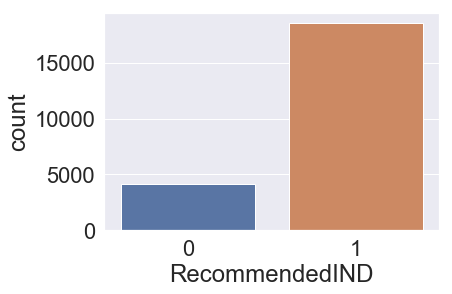

In [151]:
sns.countplot(df.RecommendedIND)

In [152]:
df.head()

Age                                         ReviewText  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it's sooo pretty.  i happene...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it's fun, fl...       5   
4   47  This shirt is very flattering to all due to th...       5   

   RecommendedIND  PositiveFeedbackCount    DivisionName DepartmentName  \
0               1                      0       Initmates       Intimate   
1               1                      4         General        Dresses   
2               0                      0         General        Dresses   
3               1                      0  General Petite        Bottoms   
4               1                      6         General           Tops   

   ClassName                                       CombinedText  \
0  Intimates   Absolutely wonderful - silky and sexy and com...   
1    Dresses   Love this dress!  it's sooo pretty.  i happen...   
2    Dresses  Some major design flaws I had such high hopes ...   
3      Pants  My favorite buy! I love, love, love this jumps...   
4    Blouses  Flattering shirt This shirt is very flattering...   

                                     ReviewTextLower  ModifiedRating  \
0  absolutely wonderful - silky and sexy and comf...               1   
1   this !  it's sooo pretty.  i happened to find...               5   
2  i had such high hopes for this  and really wan...               1   
3  i , ,  this jumpsuit. it's fun, flirty, and fa...               5   
4  this shirt is very flattering to all due to th...               5   

                                   CombinedTextLower  
0   absolutely wonderful - silky and sexy and com...  
1    this !  it's sooo pretty.  i happened to fin...  
2  some major design flaws i had such high hopes ...  
3  my favorite buy! i , ,  this jumpsuit. it's fu...  
4  flattering shirt this shirt is very flattering...

In [153]:
#rating_class = df[(df['Rating'] == 1) | (df['Rating'] == 5)]
X = df.CombinedTextLower
y = df.RecommendedIND

In [154]:
count_vectorizer = CountVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6)

cv_data = count_vectorizer.fit_transform(X)
tfidf_data = tfidf_vectorizer.fit_transform(X)

In [155]:
len(count_vectorizer.vocabulary_)

267875

In [156]:
X_train, X_test, y_train, y_test = train_test_split(cv_data, y, test_size=0.3, random_state=42, stratify=y)

In [157]:
# using SMOTE to oversample
X_train_smoted, y_train_smoted = SMOTE(random_state=42).fit_sample(X_train,y_train)

/Users/harshil/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [158]:
print(Counter(y_train_smoted))

Counter({1: 12968, 0: 12968})


In [159]:
nb = MultinomialNB()
nb.fit(X_train_smoted, y_train_smoted)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [160]:
y_pred = nb.predict(X_test)

In [161]:
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[ 753  477]
 [ 263 5296]]


              precision    recall  f1-score   support

           0       0.74      0.61      0.67      1230
           1       0.92      0.95      0.93      5559

    accuracy                           0.89      6789
   macro avg       0.83      0.78      0.80      6789
weighted avg       0.89      0.89      0.89      6789



In [162]:
logit = LogisticRegression()
logit.fit(X_train_smoted, y_train_smoted)

/Users/harshil/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [163]:
y_pred = logit.predict(X_test)

In [164]:
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[ 829  401]
 [ 490 5069]]


              precision    recall  f1-score   support

           0       0.63      0.67      0.65      1230
           1       0.93      0.91      0.92      5559

    accuracy                           0.87      6789
   macro avg       0.78      0.79      0.78      6789
weighted avg       0.87      0.87      0.87      6789

